# Introduction
In the realm of data science and machine learning, classification plays a pivotal role in transforming raw data into actionable insights. This project focuses on implementing and evaluating various classification algorithms to predict categorical outcomes accurately. By leveraging different models, including Logistic Regression and K-Nearest Neighbors (KNN), we aim to uncover patterns within the data and enhance predictive accuracy.

# Project Overview
This project is dedicated to the development and assessment of machine learning models for classification tasks. We utilize a combination of feature extraction techniques and hyperparameter optimization to build robust models. The primary objective is to compare the performance of different classification algorithms and identify the most effective model for our dataset.

# Objectives
The key objectives of this project are:

* *Model Development*: Implement various classification models.
* *Feature Extraction*: Utilize techniques such as TF-IDF to transform raw data into meaningful features.
* *Hyperparameter Optimization*: Employ grid search and random search to fine-tune model parameters and enhance performance.
* *Model Evaluation*: Assess the models using metrics such as accuracy, precision, recall, F1 score, and specificity.
* *Comparative Analysis*: Compare the performance of different models to identify the most effective classification algorithm for the dataset.

# Importing packages

Importing the necessary packages for the project.

In [2]:
!pip install imbalanced-learn
import numpy as np
import pandas as pd 
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelBinarizer

from sklearn.utils.validation import check_is_fitted
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, log_loss, confusion_matrix, roc_curve, auc, precision_recall_curve
# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

# Loading Data

Loading the dataset from the 'train.csv' and 'test.csv' file.

In [13]:
df_train = pd.read_csv("train.csv", index_col=False)
df_test = pd.read_csv('test.csv')

# Data Cleaning

In this section, we perform various data cleaning tasks to prepare the dataset for further analysis and modeling.


In [14]:
## First 10 Rows of df_train
df_train.head(10)

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business
5,"India’s Russian oil imports slip in Oct, Saudi...",Russian crude accounted for nearly 35 per cent...,India’s oil imports from Russia averaged 1.57 ...,https://indianexpress.com/article/business/com...,business
6,Neelkanth Mishra appointed part-time chairpers...,The board of the UIDAI comprises a chairperson...,"Neelkanth Mishra, chief economist at Axis Bank...",https://indianexpress.com/article/business/eco...,business
7,Centre issues advisory to social media platfor...,The IT ministry had earlier also issued adviso...,The Ministry of Electronics and IT (MeitY) has...,https://indianexpress.com/article/business/cen...,business
8,Asian shares rise after eased pressure on bond...,US futures were little changed and oil prices ...,"Shares advanced Wednesday in Asia, tracking Wa...",https://indianexpress.com/article/business/wor...,business
9,India’s demand for electricity for ACs to exce...,India's demand for electricity for running hou...,nrIndia’s demand for electricity for running h...,https://indianexpress.com/article/business/eco...,business


# Dataset Summary

The dataset contains news articles from various domains, including Business, Technology, Sports, Education, and Entertainment. Each row in the dataset represents a single news article and consists of the following columns:

- **headlines**: The headline or title of the news article.
- **description**: A brief description or summary of the news article's content.
- **content**: The main body or text of the news article.
- **url**: The URL or web address of the news article.
- **category**: The category or domain to which the news article belongs (e.g., Business, Technology, Sports, etc.).

This dataset will be used for training a machine learning model to classify news articles into their respective categories based on the provided features (headlines, description, content, and URL).

## Dataset Size

The dataset contains a total of 5,520 rows (news articles) and 5 columns (features):

In [15]:
df_train.shape

(5520, 5)

This indicates that the dataset has 5,520 instances (news articles) and 5 features (headlines, description, content, url, category).

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB


## Data Information

The DataFrame contains the following information:

- It is a pandas DataFrame object.
- The DataFrame has 5,520 rows (from index 0 to 5,519).
- There are 5 columns in the DataFrame.
- All columns are non-null, meaning there are no missing values.
- All columns have the data type 'object', which typically represents string data.
- The total memory usage of the DataFrame is approximately 215.8 KB.

**Checking any missing values**

Checking for missing values involves examining each column in the datasets to ensure completeness and data integrity. This ensures that all required data points are present, avoiding potential errors or biases in subsequent analyses or modeling tasks.

In [20]:
class DataFrameProcessor:
    def __init__(self, df):
        self.df = df

    def check_duplicates(self):
        """
        Check for duplicate rows in the DataFrame and print the result.
        """
        duplicate_rows = self.df[self.df.duplicated()]

        if duplicate_rows.empty:
            print("No duplicates found.")
        else:
            print("Duplicates found!")
            print(duplicate_rows)

    def check_missing_values(self):
        """
        Check for missing values in the DataFrame and print the count of missing values in each column.
        """
        missing_values_count = self.df.isnull().sum()
        print("Missing values count per column:")
        print(missing_values_count)

    def convert_columns_to_lowercase(self, columns):
        """
        Convert specified columns to lowercase.
        """
        for column in columns:
            self.df[column] = self.df[column].str.lower()

    def remove_punctuation(self, columns):
        """
        Remove punctuation from specified columns.
        """
        for column in columns:
            self.df[column] = self.df[column].str.replace(f"[{string.punctuation}]", " ", regex=True)

    def clean_whitespace(self, columns):
        """
        Trim whitespace and replace multiple spaces with a single space in specified columns.
        """
        for column in columns:
            self.df[column] = self.df[column].str.strip()
            self.df[column] = self.df[column].str.replace("\s+", " ", regex=True)

    def remove_stopwords(self, columns):
        """
        Remove stopwords from specified columns.
        """
        stop_words = set(stopwords.words('english'))
        
        for column in columns:
            self.df[column] = self.df[column].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    def tokenize_columns(self, columns):
        """
        Tokenize text in specified columns.
        """
        for column in columns:
            self.df[column] = self.df[column].apply(word_tokenize)

    def stem_columns(self, columns):
        """
        Stem words in specified columns using PorterStemmer.
        """
        stemmer = PorterStemmer()
        
        for column in columns:
            self.df[column] = self.df[column].apply(lambda x: [stemmer.stem(word) for word in x])

## Initiaalize processor for training and testing data

In [21]:
# Initializing DataFrameProcessors
processor_train = DataFrameProcessor(df_train)
processor_test = DataFrameProcessor(df_test)

## Duplicate Rows Check

The following code checks for the presence of duplicate rows in the DataFrame:

In [27]:
# Checking Duplicates in processor_train
processor_train.check_duplicates()

No duplicates found.


**No Duplicates Found**

The analysis has concluded that there are no duplicate entries in the dataset.


In [28]:
# Checking Duplicates in processor_test
processor_test.check_duplicates()

No duplicates found.


**No Duplicates Found**

The analysis has concluded that there are no duplicate entries in the test dataset.


# Check for Missing Values and Print Count

Before proceeding with any data manipulation or analysis, it's crucial to assess the quality of the dataset. One common issue in datasets is missing values, which can lead to biased or inaccurate analyses if not addressed properly. Below, we demonstrate how to check for missing values and print the count of missing values in each column of our DataFrame.



In [29]:
# Checking Missing Values in processor_train
processor_train.check_missing_values()

Missing values count per column:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


In [31]:
# Checking Missing Values in processor_test
processor_test.check_missing_values()

Missing values count per column:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


## Summary of Missing Values Count Per Column

After analyzing the dataset, we find that there are no missing values in any of the columns. Specifically, the counts are as follows:

- **Headlines**: 0
- **Description**: 0
- **Content**: 0
- **URL**: 0
- **Category**: 0

These results indicate that the dataset is clean and ready for further analysis without needing any preprocessing for missing values.


In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation.

## Preparing Your Environment for NLP Tasks

Before diving into NLP tasks with NLTK, it's crucial to set up your environment correctly. This involves installing the required libraries and downloading the necessary NLTK corpora and tokenizers. Follow these steps to ensure your setup is ready:

1. **Import Necessary Libraries**

First, you'll need to import the libraries that will be used for various NLP tasks. This includes standard Python libraries for string manipulation, as well as specific NLTK modules for tokenization, stop words removal, and stemming/lemmatization. Execute the following code to import these libraries:



## Preparing Your Environment for NLP Tasks

Before diving into NLP tasks with NLTK, it's crucial to set up your environment correctly. This involves installing the required libraries and downloading the necessary NLTK corpora and tokenizers. Follow these steps to ensure your setup is ready:

1. **Import Necessary Libraries**

First, you'll need to import the libraries that will be used for various NLP tasks. This includes standard Python libraries for string manipulation, as well as specific NLTK modules for tokenization, stop words removal, and stemming/lemmatization. Execute the following code to import these libraries:



In [32]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

Downloading the NLTK data files.


2. **Download NLTK Data**

Some NLTK functionalities depend on external data that needs to be downloaded manually. To ensure these functionalities work correctly, run the following commands in your Python environment to download the necessary NLTK data:



In [33]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\SL
[nltk_data]     MARTIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SL
[nltk_data]     MARTIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SL
[nltk_data]     MARTIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Lowercasing Text Columns in DataFrame

To standardize the case of text data across different columns in a DataFrame, it's often beneficial to convert all text to lowercase. This ensures consistency in text comparisons and analyses. Below is the code to lowercase the text in specific columns of a DataFrame:



In [34]:
columns_to_process = ['headlines', 'description', 'content', 'url', 'category']

In [35]:
# Converting Columns to Lowercase in processor_train and processor_test
processor_train.convert_columns_to_lowercase(columns_to_process)
processor_test.convert_columns_to_lowercase(columns_to_process)


This code snippet iterates over the specified columns ('headlines', 'description', 'content', 'url', and 'category') in the DataFrame `df` and applies the `.str.lower()` method to each, converting all text to lowercase.


## Removing Punctuation from Text Columns in DataFrame

To enhance the cleanliness and uniformity of text data, it's common to remove punctuation marks. This can simplify text analysis and improve the performance of certain algorithms. Below is the code to remove punctuation from specific columns of a DataFrame:



In [36]:
# Removing Punctuation from Columns in processor_train and processor_test
processor_train.remove_punctuation(columns_to_process)
processor_test.remove_punctuation(columns_to_process)


This code snippet iterates over the specified columns ('headlines', 'description', 'content', 'url', and 'category') in the DataFrame `df` and applies the `.str.replace()` method with a regular expression to replace all punctuation marks with spaces. This helps in cleaning the text data by eliminating punctuation while preserving the textual content.


## Cleaning Text Columns in DataFrame by Stripping Whitespace and Replacing Multiple Spaces

To further refine the text data in a DataFrame, it's important to remove leading and trailing whitespace and consolidate multiple consecutive spaces into single spaces. This enhances the readability and consistency of the text data. Below is the code to achieve this for specific columns of a DataFrame:



In [37]:
# Cleaning Whitespace in Columns for processor_train and processor_test
processor_train.clean_whitespace(columns_to_process)
processor_test.clean_whitespace(columns_to_process)


This code snippet iterates over the specified columns ('headlines', 'description', 'content', 'url', and 'category') in the DataFrame `df`. First, it uses `.str.strip()` to remove leading and trailing whitespace from each text entry. Then, it employs `.str.replace("\s+", " ", regex=True)` to replace sequences of one or more whitespace characters (including spaces, tabs, and newlines) with a single space. This process cleanses the text data by normalizing whitespace usage, making the text cleaner and more uniform.


## Removing Stop Words from Text Columns in DataFrame

Stop words are commonly used words that do not carry much meaning in the context of text analysis and can be safely removed to reduce noise in the data. Below is the code to remove English stop words from specific columns of a DataFrame:



In [38]:
# Removing Stopwords from Columns in processor_train and processor_test
processor_train.remove_stopwords(columns_to_process)
processor_test.remove_stopwords(columns_to_process)


This code snippet iterates over the specified columns ('headlines', 'description', 'content', 'url', and 'category') in the DataFrame `df`. For each column, it applies a lambda function that splits the text into individual words, filters out stop words, and then joins the remaining words back together with spaces. This process removes stop words from the text data, thereby enhancing the focus on more meaningful words and phrases.


## Tokenizing Text Columns in DataFrame Using NLTK

Tokenization is the process of breaking down text into individual words or tokens, which is a fundamental step in many natural language processing (NLP) tasks. Below is the code to tokenize the text in specific columns of a DataFrame using NLTK's `word_tokenize` function:



In [39]:
# Tokenizing Columns in processor_train and processor_test
processor_train.tokenize_columns(columns_to_process)
processor_test.tokenize_columns(columns_to_process)


This code snippet iterates over the specified columns ('headlines', 'description', 'content', 'url', and 'category') in the DataFrame `df`. It applies the `word_tokenize` function from NLTK to each column, effectively splitting the text into individual words or tokens. This process prepares the text data for further NLP tasks such as filtering, stemming, or building frequency distributions.


## Stemming Text Columns in DataFrame Using NLTK

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. This technique is useful in natural language processing (NLP) for simplifying words and reducing the complexity of text data. Below is the code to apply stemming to the text in specific columns of a DataFrame using NLTK's `PorterStemmer`:



In [40]:
# Stemming Columns in processor_train and processor_test
processor_train.stem_columns(columns_to_process)
processor_test.stem_columns(columns_to_process)


This code snippet iterates over the specified columns ('headlines', 'description', 'content', 'url', and 'category') in the DataFrame `df`. For each column, it applies a lambda function that stems each word in the list of tokens using the `PorterStemmer` instance. This process reduces words to their root forms, which can help in simplifying text data and potentially improving the performance of NLP tasks such as text classification or clustering.


**Lemmatization**

Lemmatization is a linguistic process that involves reducing words to their base or dictionary form, known as the lemma. Unlike stemming, which simply removes affixes without considering the context or meaning of the word, lemmatization considers the context and morphological analysis to transform words accurately. This ensures that different inflected forms of a word are mapped to a single root word, improving the precision of natural language processing tasks such as text analysis, information retrieval, and semantic understanding.

In [67]:
# Create a function that will tokenize and lemmatize the words from the dataframes
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token
    return ' '.join(lemmatized_tokens)  # Join the lemmatized tokens back into a string

lemmatizer = WordNetLemmatizer()

# Apply the function to lemmatize words in the relevant columns
df_train['headlines'] = df_train['headlines'].astype(str).apply(lemmatize_text)
df_train['description'] = df_train['description'].astype(str).apply(lemmatize_text)
df_train['content'] = df_train['content'].astype(str).apply(lemmatize_text)

df_test['headlines'] = df_test['headlines'].astype(str).apply(lemmatize_text)
df_test['description'] = df_test['description'].astype(str).apply(lemmatize_text)
df_test['content'] = df_test['content'].astype(str).apply(lemmatize_text)

# Display the first few rows to check the results
print(df_train.head())
print(df_test.head())

                                           headlines  \
0     rbi revis definit polit expo person kyc purpos   
1  ndtv q2 net profit fall 57 4 r 5 55 crore impa...   
2  akasa air ‘ well capitalis ’ grow much faster ...   
3  india ’ s current account deficit declin sharp...   
4     state borrow cost soar 7 68 highest far fiscal   

                                         description  \
0  central bank also ask chairperson chief execut...   
1  ndtv consolid revenu oper r 95 55 crore r 105 ...   
2  initi share sale open public subscript juli 17...   
3  current account deficit cad 3 8 per cent gdp u...   
4  price shot reflect overal higher risk avers in...   

                                             content  \
0  reserv bank india rbi chang definit polit expo...   
1  broadcast new delhi televis ltd monday report ...   
2  homegrown server maker netweb technolog india ...   
3  india ’ s current account deficit declin sharp...   
4  state forc pay nose weekli auction debt tue

In [68]:
# Displaying the DataFrame from processor_train
(processor_train.df)

,headlines,description,content,url,category
0,rbi revis definit polit expo person kyc purpos,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit polit expo...,"[http, indianexpress, com, articl, busi, bank,...",busi
1,ndtv q2 net profit fall 57 4 r 5 55 crore impa...,ndtv consolid revenu oper r 95 55 crore r 105 ...,broadcast new delhi televis ltd monday report ...,"[http, indianexpress, com, articl, busi, compa...",busi
2,akasa air ‘ well capitalis ’ grow much faster ...,initi share sale open public subscript juli 17...,homegrown server maker netweb technolog india ...,"[http, indianexpress, com, articl, busi, marke...",busi
3,india ’ s current account deficit declin sharp...,current account deficit cad 3 8 per cent gdp u...,india ’ s current account deficit declin sharp...,"[http, indianexpress, com, articl, busi, econo...",busi
4,state borrow cost soar 7 68 highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,"[http, indianexpress, com, articl, busi, econo...",busi
...,...,...,...,...,...
5515,samsung send invit ‘ unpack 2024 ’ new galaxi ...,samsung like announc next gener galaxi s24 ser...,samsung plan reveal next gener flagship galaxi...,"[http, indianexpress, com, articl, technolog, ...",technolog
5516,googl pixel 8 pro accident appear offici websit,pixel 8 pro like carri predecessor design lang...,googl accident gave u glimps upcom flagship ph...,"[http, indianexpress, com, articl, technolog, ...",technolog
5517,amazon ad googl search redirect user microsoft...,click real look amazon ad open page suggest pc...,new scam seem make round internet legitim look...,"[http, indianexpress, com, articl, technolog, ...",technolog
5518,elon musk ’ s x previous twitter worth le half...,elon musk x formerli twitter lost half valuat ...,year elon musk acquir twitter 44 billion platf...,"[http, indianexpress, com, articl, technolog, ...",technolog


In [69]:
# Displaying the DataFrame from processor_test
(processor_test.df)

,headlines,description,content,url,category
0,"[ 'nlc ' , 'india ' , 'win ' , 'contract ' , '...","[ 'state ' , 'own ' , 'firm ' , 'nlc ' , 'indi...","[ 'state ' , 'own ' , 'firm ' , 'nlc ' , 'indi...","[http, indianexpress, com, articl, busi, compa...",busi
1,"[ 'sbi ' , 'clerk ' , 'prelim ' , 'exam ' , 'd...","[ 'sbi ' , 'clerk ' , 'prelim ' , 'exam ' , 's...","[ 'sbi ' , 'clerk ' , 'prelim ' , 'exam ' , 's...","[http, indianexpress, com, articl, educ, sbi, ...",educ
2,"[ 'golden ' , 'globe ' , 'michel ' , 'yeoh ' ,...","[ 'barbi ' , 'top ' , 'nomine ' , 'year ' , 'f...","[ 'michel ' , 'yeoh ' , 'ferrel ' , 'angela ' ...","[http, indianexpress, com, articl, entertain, ...",entertain
3,"[ 'oneplu ' , 'nord ' , ' 3 ' , 'rs ' , '27 ' ...","[ 'new ' , 'deal ' , 'make ' , 'oneplu ' , 'no...","[ 'review ' , 'oneplu ' , 'nord ' , ' 3 ' , '5...","[http, indianexpress, com, articl, technolog, ...",technolog
4,"[ 'adani ' , 'famili ' , ' ’ ' , 's ' , 'partn...","[ 'cite ' , 'review ' , 'file ' , 'multipl ' ,...","[ 'million ' , 'dollar ' , 'invest ' , 'public...","[http, indianexpress, com, articl, busi, adani...",busi
...,...,...,...,...,...
1995,"[ 'sri ' , 'lankan ' , 'govern ' , 'renew ' , ...","[ 'licenc ' , 'origin ' , 'issu ' , '2003 ' , ...","[ 'sri ' , 'lankan ' , 'govern ' , 'renew ' , ...","[http, indianexpress, com, articl, busi, compa...",busi
1996,"[ 'kia ' , 'launch ' , 'new ' , 'selto ' , 'pr...","[ 'share ' , 'infosi ' , 'india ' , 'second ' ...","[ 'share ' , 'infosi ' , 'india ' , ' ’ ' , 's...","[http, indianexpress, com, articl, busi, marke...",busi
1997,"[ 'rebel ' , 'moon ' , 'movi ' , 'review ' , '...","[ 'rebel ' , 'moon ' , 'movi ' , 'review ' , '...","[ 'whatev ' , 'tonnag ' , 'cash ' , 'laden ' ,...","[http, indianexpress, com, articl, entertain, ...",entertain
1998,"[ 'chatgpt ' , 'popular ' , 'ai ' , 'tool ' , ...","[ 'come ' , 'distant ' , 'second ' , 'place ' ...","[ 'chatgpt ' , 'emerg ' , 'undisput ' , 'winne...","[http, indianexpress, com, articl, technolog, ...",technolog


## Exploratory Data Analysis (EDA)

In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task. It is not easy to look at a column of numbers or a whole spreadsheet and determine important characteristics of the data. It may be tedious, boring, and/or overwhelming to derive insights by looking at plain numbers. Exploratory data analysis techniques have been devised as an aid in this situation.

In [44]:
#Summary statistics for the training dataset
df_train.describe() 

,headlines,description,content,url,category
count,5520,5520,5520,5520,5520
unique,5512,5507,5513,5514,5
top,"[intern, educ, day, 2024, know, celebr, jan, 2...","[“, iit, graduat, highli, commit, dedic, resea...","[grand, slam, fever, grip, tenni, fan, world, ...","[http, indianexpress, com, articl, educ, kc, m...",[educ]
freq,2,2,5,2,1520


In [45]:
#Displaying information about the training dataset
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**Insights:** The dataset contains five columns ('headlines', 'description', 'content', 'url', and 'category') of object type with no missing values.

</div>

In [47]:
#Printing the shape of the training dataset
print("Train dataset shape:", df_train.shape) 

Train dataset shape: (5520, 5)


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**Insights:** The training dataset contains 5,520 rows and  5 columns.

</div>

## Visualizing Category Related Words

Here we use the word cloud module to show the category-related words.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

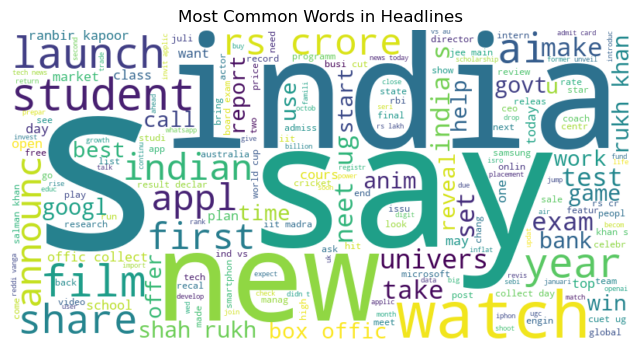

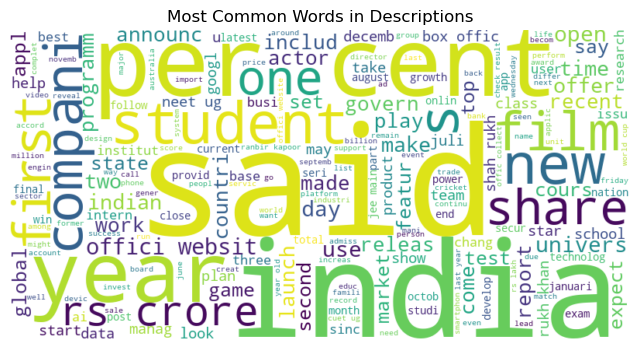

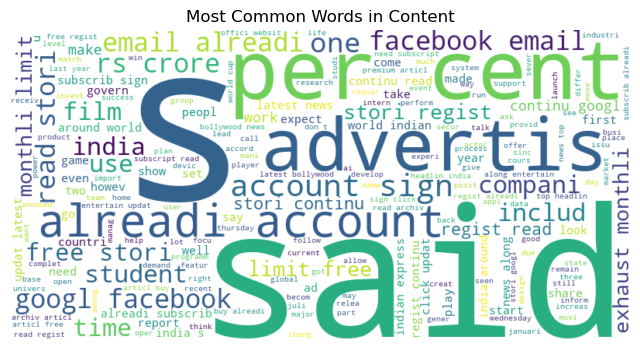

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_train and train_copy_df are already defined

# Helper function to convert lists to strings
def list_to_string(column):
    return column.apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Convert lists to strings in 'headlines' column
df_train['headlines'] = list_to_string(df_train['headlines'])
all_headlines = ' '.join(df_train['headlines'])
wordcloud_headlines = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_headlines)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_headlines, interpolation='bilinear')
plt.title('Most Common Words in Headlines')
plt.axis('off')
plt.show()

# Convert lists to strings in 'description' column
df_train['description'] = list_to_string(df_train['description'])
all_descriptions = ' '.join(df_train['description'])
wordcloud_descriptions = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_descriptions)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_descriptions, interpolation='bilinear')
plt.title('Most Common Words in Descriptions')
plt.axis('off')
plt.show()

# Convert lists to strings in 'content' column
df_train['content'] = list_to_string(df_train['content'])
all_content = ' '.join(df_train['content'])
wordcloud_content = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_content)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_content, interpolation='bilinear')
plt.title('Most Common Words in Content')
plt.axis('off')
plt.show()


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**Insights:** In the training dataset analysis, certain words appear frequently across different sections. Headlines often include "India," "say," and "watch," highlighting topics of significant interest. Descriptions commonly feature "per," "cent," "said," and "India," focusing on numerical data and reported statements. Content sections frequently mention "per", "cent", "advertise," and "said," discussing percentages, advertising, and reported information. These common words reveal key themes and subjects within each dataset segment, providing valuable insights into content trends and audience preferences.

</div>

##### Target Variable Distribution

The below graph shows the distribution of categories in the training dataset from our Training dataset.

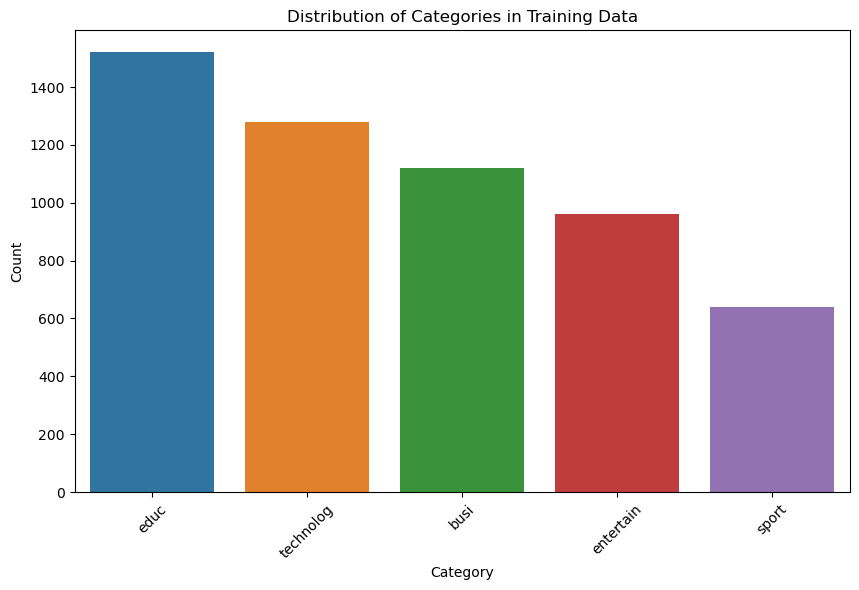

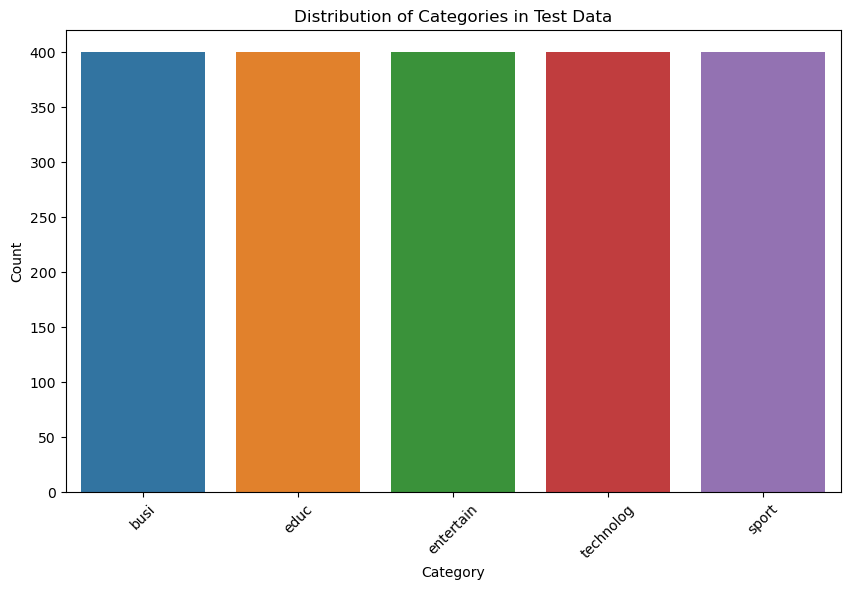

In [60]:
# Plot the distribution of categories in the training dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='category', order=df_train['category'].value_counts().index)
plt.title('Distribution of Categories in Training Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of categories in the test dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='category', order=df_test['category'].value_counts().index)
plt.title('Distribution of Categories in Test Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Overall, the data is somewhat imbalanced, with Education articles being the most prevalent and Sport articles being the least. This imbalance might impact the performance of a machine learning model trained on this data, particularly for categories with fewer instances.

In [70]:
# Displaying unique values in the 'category' column of the training dataset
print("Unique values in category column:", df_train['category'].unique())

Unique values in category column: ['busi' 'sport' 'entertain' 'educ' 'technolog']


Training Dataset Category Counts:
category
educ         1520
technolog    1280
busi         1120
entertain     960
sport         640
Name: count, dtype: int64


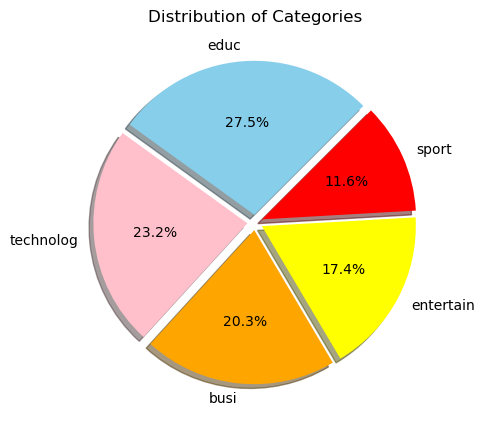

In [72]:
import matplotlib.pyplot as plt
# Counting the number of occurrences of each category in the training dataset
train_category_counts = df_train['category'].value_counts()

print("Training Dataset Category Counts:")
print(train_category_counts)

# Count occurrences of each category
category_counts = df_train['category'].value_counts()

# Plotting
fig = plt.figure(figsize=(5, 5))
colors = ["skyblue", "pink", "orange", "yellow", "red"]  # Adjust colors as needed

# Create pie chart
pie = plt.pie(category_counts, labels=category_counts.index,
              autopct="%1.1f%%",
              shadow=True,
              colors=colors,
              startangle=45,
              explode=(0.05, 0.05, 0.05, 0.05, 0.05))

plt.title("Distribution of Categories")
plt.show()

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**Insights:** In the training dataset, the categories are distributed with education being the most frequent, followed by technology, business, entertainment, and sports. This distribution gives an overview of the dataset's composition, emphasizing the prevalence of educational and technological topics alongside business, entertainment, and sports categories.

</div>


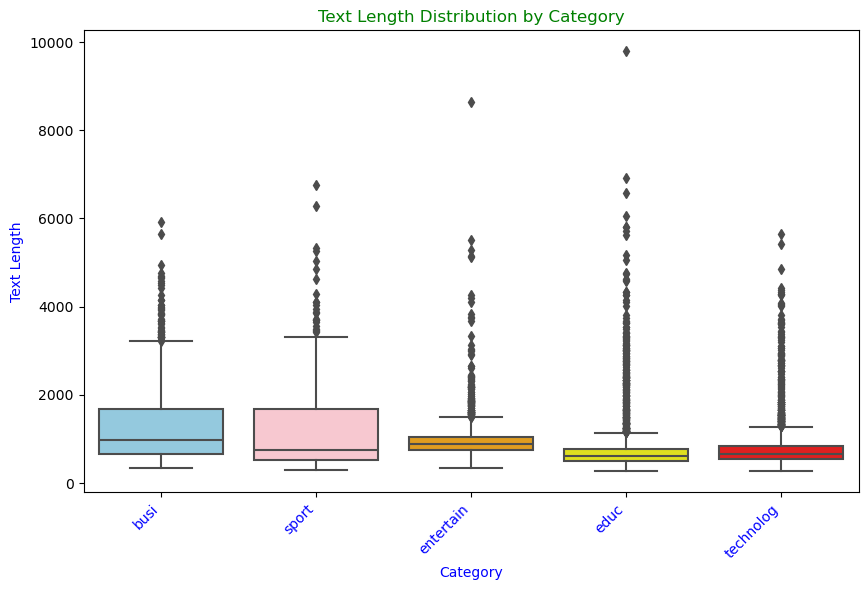

In [74]:
# Combine 'headlines', 'description', and 'content' into a single column for both train and test datasets
df_train['text'] = df_train['headlines'] + ' ' + df_train['description'] + ' ' + df_train['content']
df_test['text'] = df_test['headlines'] + ' ' + df_test['description'] + ' ' + df_test['content']

# Create a new column 'text_length' to store the length of text
df_train['text_length'] = df_train['text'].apply(len)

# Define a custom color palette
custom_palette = ["skyblue", "pink", "orange", "yellow", "red"]

# Create a box plot to show the distribution of text length by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='text_length', data=df_train, palette=custom_palette)
plt.xticks(rotation=45, ha='right', color='blue')  # X-axis label color changed to blue
plt.title('Text Length Distribution by Category', color='green')  # Title color changed to green
plt.xlabel('Category', color='blue')  # X-label color changed to blue
plt.ylabel('Text Length', color='blue')  # Y-label color changed to blue
plt.show()

<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**Insights:** The analysis of text lengths across categories reveals several notable findings. Firstly, all categories share the same minimum text length. However, sports exhibits the highest maximum text length, followed by business, with a significant drop observed in entertainment, technology, and finally education. Education notably displays the greatest number of points beyond its maximum text length, indicating a wider distribution of outliers compared to other categories, whereas business has the fewest. Median text lengths highlight varying central tendencies across categories, with business and entertainment showing higher medians compared to education, which exhibits the lowest median length. These insights underscore the diversity in text lengths across different content categories, offering valuable insights for content planning and audience engagement strategies. 

</div>

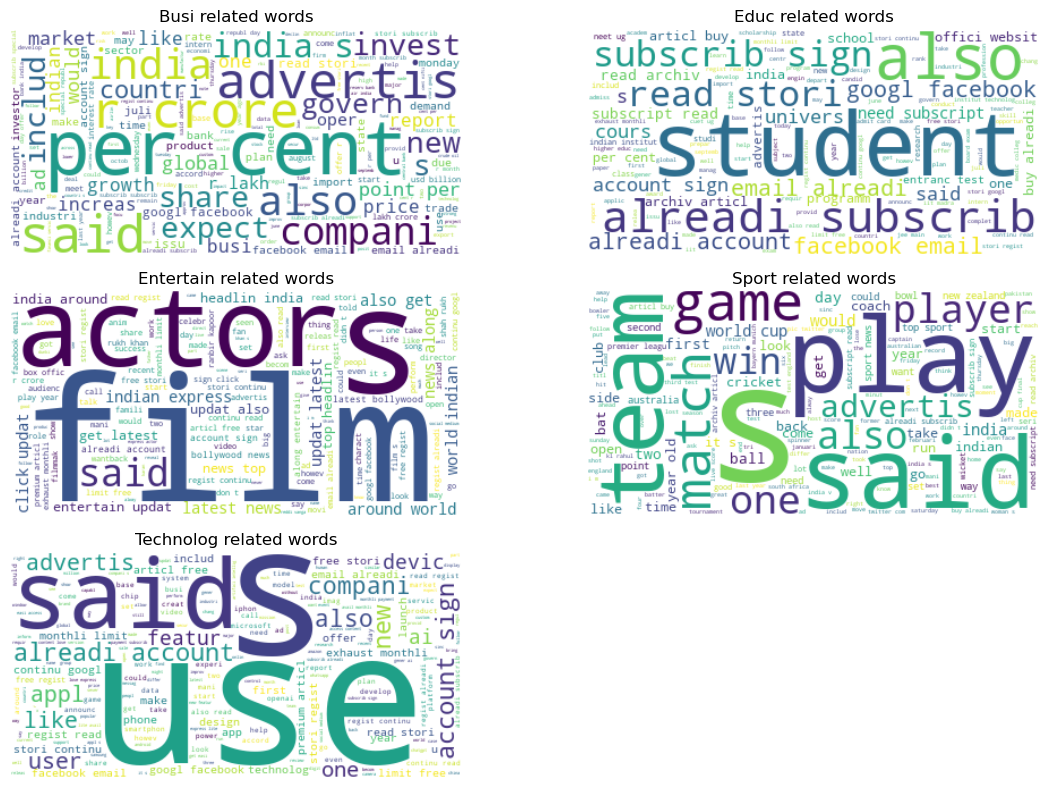

In [75]:
# Group content by category
category_texts = df_train.groupby('category')['content'].apply(lambda x: ' '.join(x)).reset_index()

def wordcloud_draw(text, category, color='white', ax=None):
    wordcloud = WordCloud(stopwords=[], background_color=color, width=400, height=200).generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"{category.capitalize()} related words")
    ax.axis("off")

# Determining the number of rows and columns based on the number of categories
num_categories = len(category_texts)
num_cols = 2
num_rows = (num_categories + num_cols - 1) // num_cols  # Calculate number of rows needed

# Creating subplots in a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Generating word clouds for each category
for i, row in category_texts.iterrows():
    category = row['category']
    text = row['content']
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    wordcloud_draw(text, category, ax=ax)

# Removing empty subplot if there's an odd number of categories
if num_categories % 2 != 0:
    fig.delaxes(axes[num_rows-1, num_cols-1])

# Adjust layout
plt.tight_layout()
plt.show()


 ##### Document Length Distribution

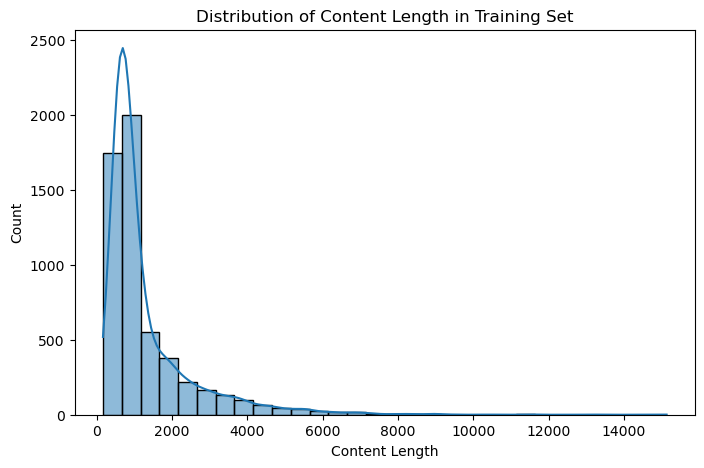

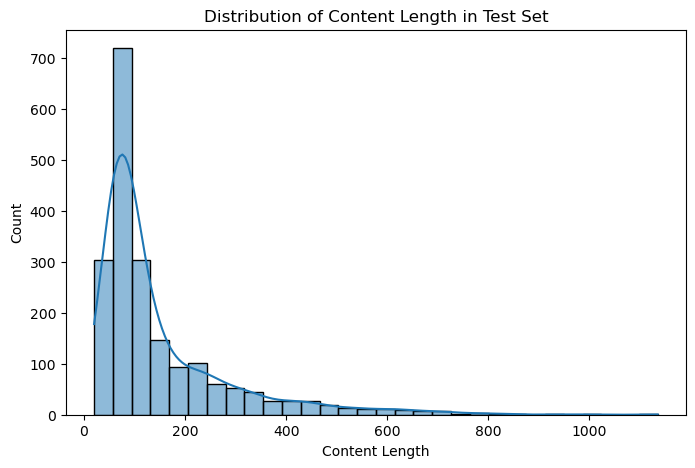

In [31]:
# Create 'content_length' column in df_test
df_test['content_length'] = df_test['content'].apply(len)

# Plot the distribution of content length in the training set
plt.figure(figsize=(8, 5))
sns.histplot(df_train['content_length'], bins=30, kde=True)
plt.title('Distribution of Content Length in Training Set')
plt.xlabel('Content Length')
plt.ylabel('Count')
plt.show()

# Plot the distribution of content length in the test set
plt.figure(figsize=(8, 5))
sns.histplot(df_test['content_length'], bins=30, kde=True)
plt.title('Distribution of Content Length in Test Set')
plt.xlabel('Content Length')
plt.ylabel('Count')
plt.show()

# Word Frequency Analysis

Number of samples in 'busi' category: 1120
Number of samples in 'sport' category: 640
Number of samples in 'entertain' category: 960
Number of samples in 'educ' category: 1520
Number of samples in 'technolog' category: 1280


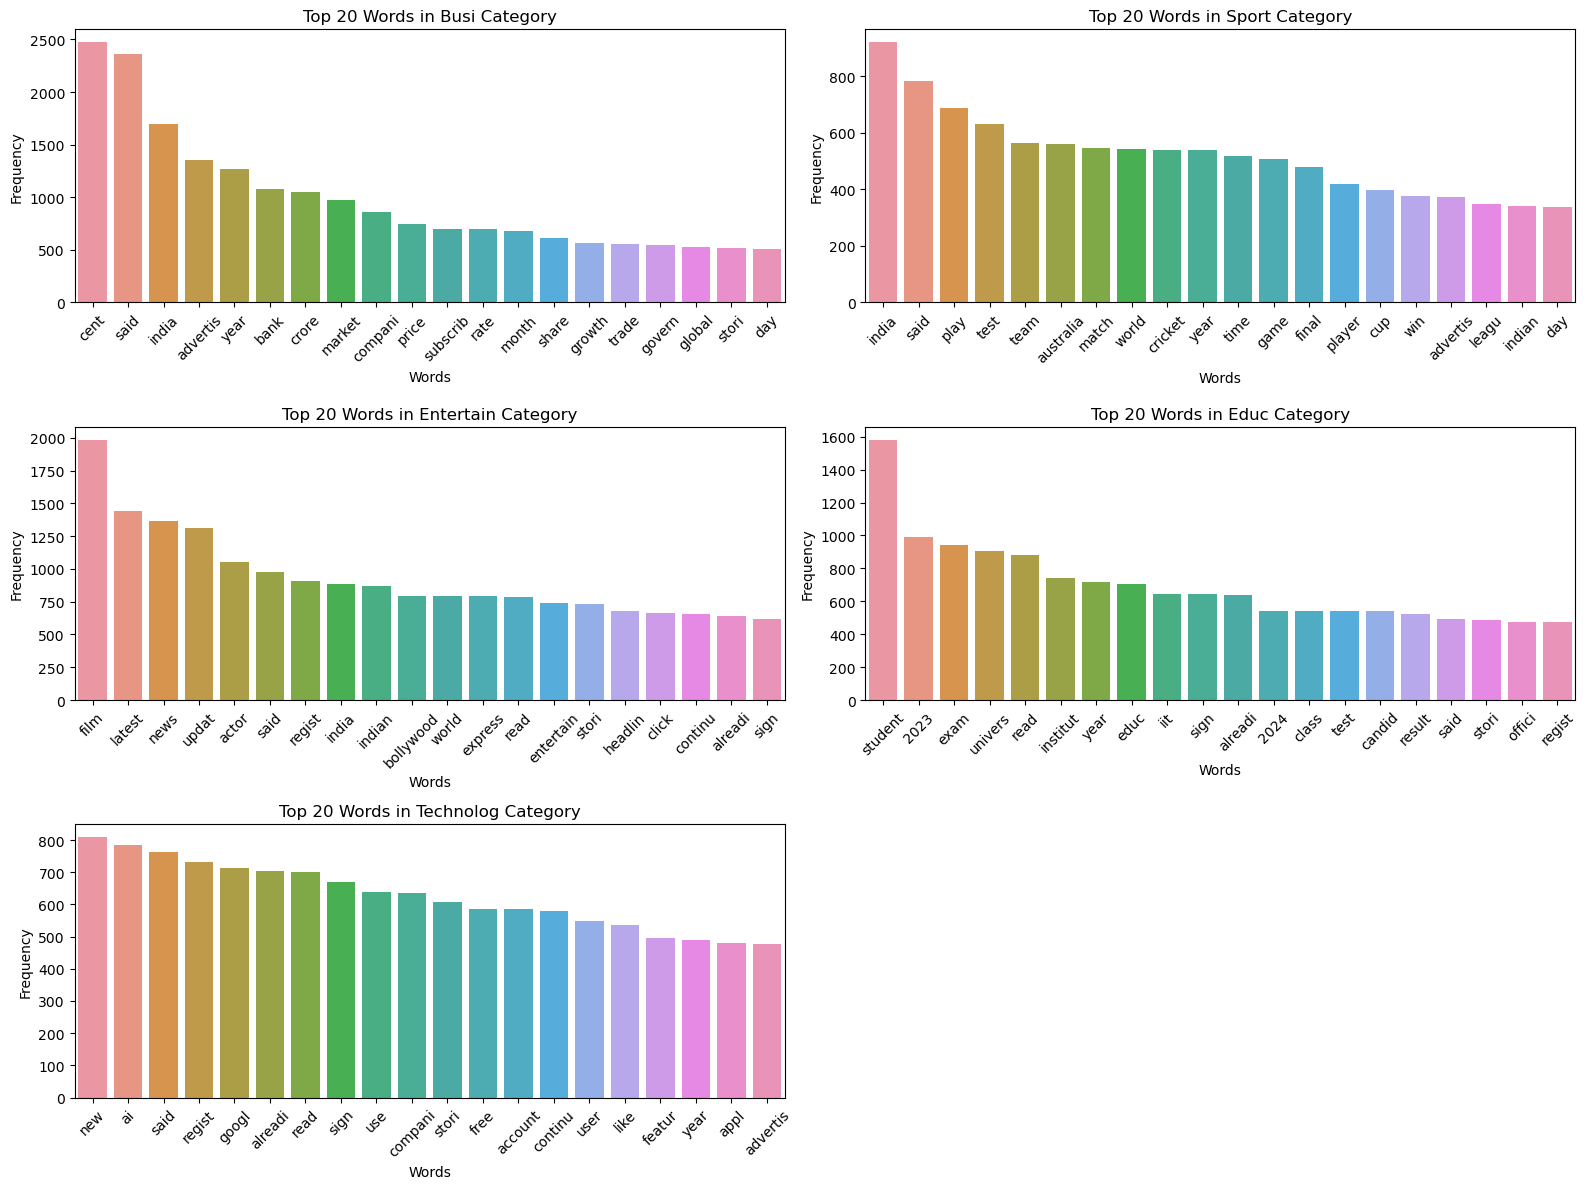

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

# Function to calculate top words for a given category
def calculate_top_words(category, df_train):
    category_count = df_train[df_train['category'] == category].shape[0]
    print(f"Number of samples in '{category}' category: {category_count}")

    # Set the sample size to be the smaller of 1000 or the actual count
    sample_size = min(1000, category_count)

    # Sample the data
    category_sample = df_train[df_train['category'] == category].sample(n=sample_size, random_state=42)

    # Convert list elements to strings by joining them
    category_sample['content'] = category_sample['content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

    # Proceed with the vectorization and plotting
    vectorizer = CountVectorizer(max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(category_sample['content'])

    # Sum words across documents
    word_counts = X.sum(axis=0)
    words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    top_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

    return top_words

# Plotting top words for each category
num_categories = df_train['category'].nunique()
num_cols = 2
num_rows = (num_categories + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

for i, category in enumerate(df_train['category'].unique()):
    top_words = calculate_top_words(category, df_train)
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
    sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], ax=ax)
    ax.set_title(f'Top 20 Words in {category.capitalize()} Category')
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

if num_categories % 2 != 0:
    fig.delaxes(axes[num_rows-1, num_cols-1])

plt.tight_layout()
plt.show()


Text Lengths for the Training Dataset:


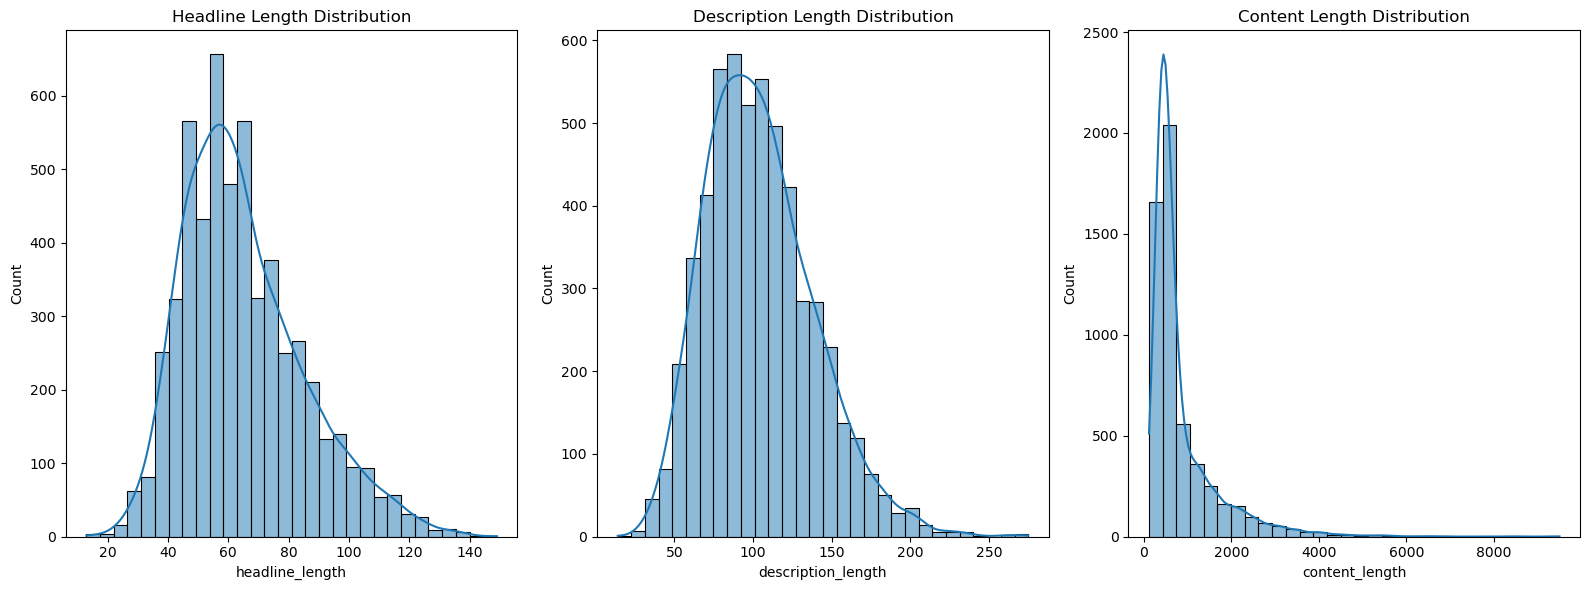

Text Lengths for the Test Dataset:


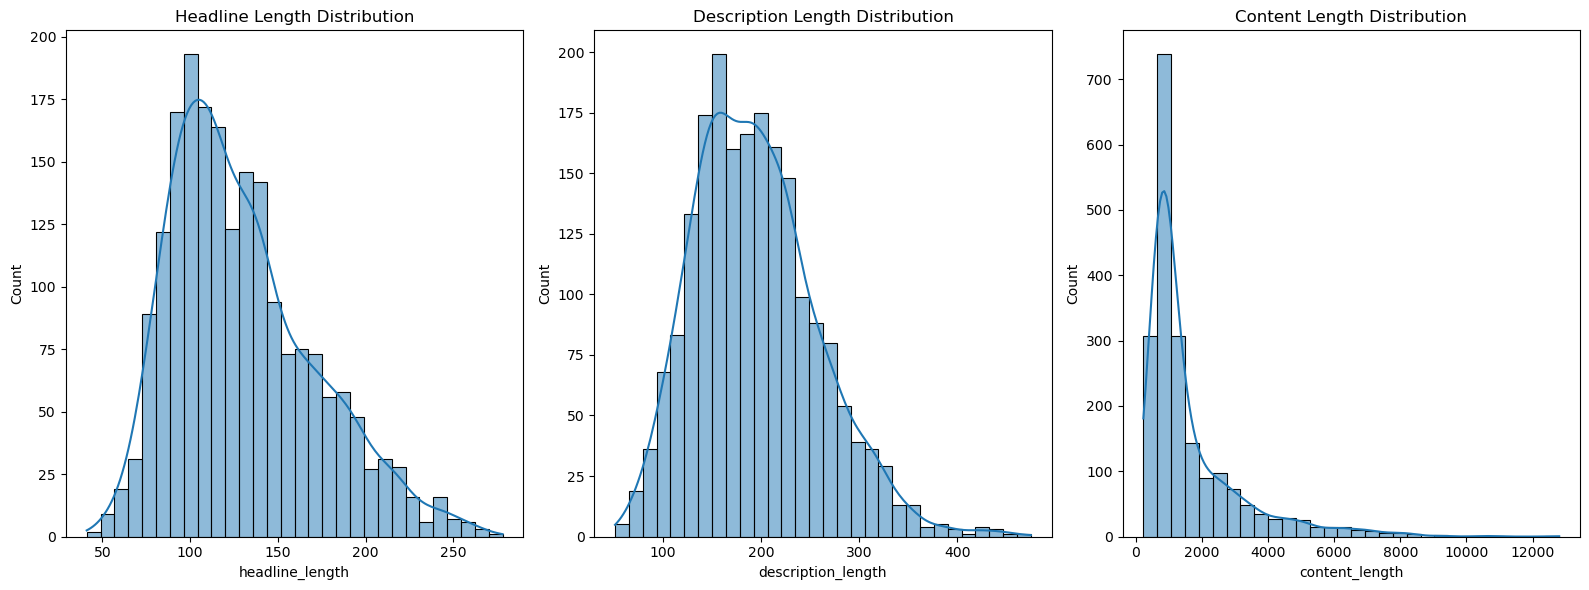

In [93]:
# Compute text lengths for the relevant columns
df_train['headline_length'] = df_train['headlines'].str.len()
df_train['description_length'] = df_train['description'].str.len()
df_train['content_length'] = df_train['content'].str.len()

df_test['headline_length'] = df_test['headlines'].str.len()
df_test['description_length'] = df_test['description'].str.len()
df_test['content_length'] = df_test['content'].str.len()

# Define the function to plot text length distribution
def plot_text_length_distribution(df, dataset_name):
    # Plot histograms of the text lengths
    print(f"Text Lengths for the {dataset_name} Dataset:")
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(df['headline_length'], kde=True, bins=30)
    plt.title('Headline Length Distribution')

    plt.subplot(1, 3, 2)
    sns.histplot(df['description_length'], kde=True, bins=30)
    plt.title('Description Length Distribution')

    plt.subplot(1, 3, 3)
    sns.histplot(df['content_length'], kde=True, bins=30)
    plt.title('Content Length Distribution')

    plt.tight_layout()
    plt.show()

# Call the function for the training dataset
plot_text_length_distribution(df_train, "Training")

# Call the function for the test dataset
plot_text_length_distribution(df_test, "Test")


    category  headlines  description      content
0       busi  57.732143   118.043750  1114.985714
1       educ  60.525658   105.207237   700.455263
2  entertain  89.879167   102.353125   825.937500
3      sport  70.009375   107.328125  1023.126562
4  technolog  55.094531    91.388281   743.793750


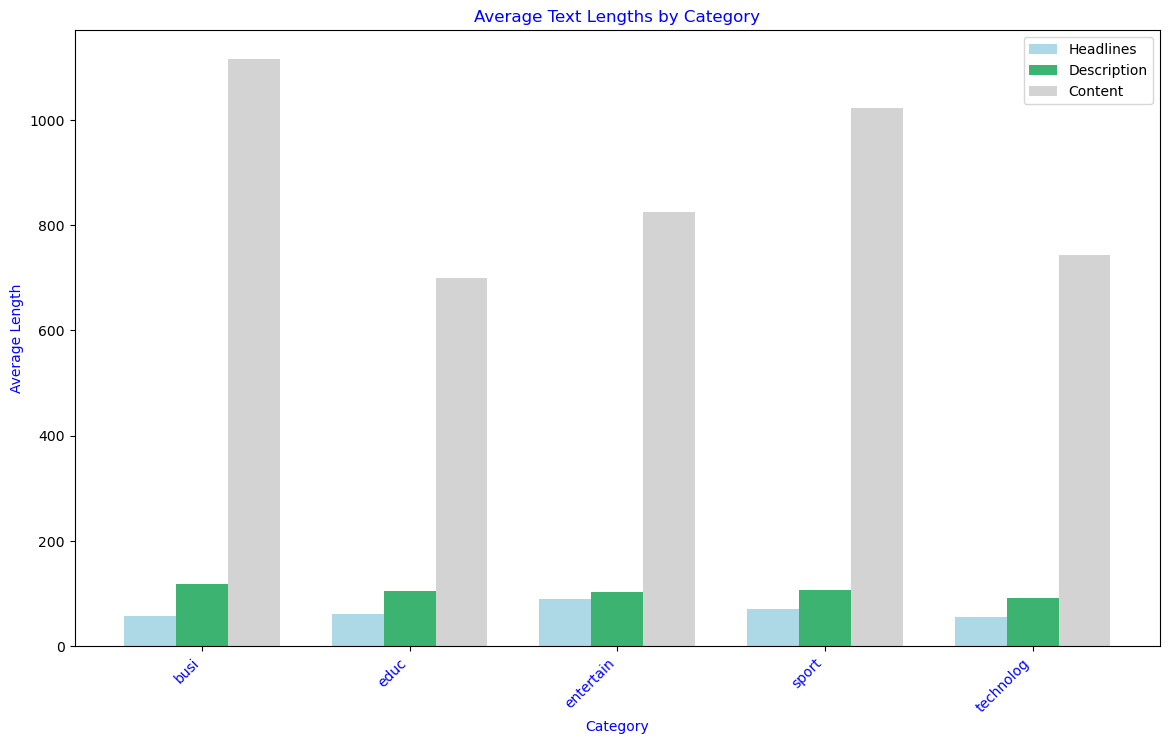

In [90]:
# Compute average text lengths by category
category_text_stats = df_train.groupby('category').agg({
    'headlines': lambda x: x.str.len().mean(),
    'description': lambda x: x.str.len().mean(),
    'content': lambda x: x.str.len().mean()
}).reset_index()

print(category_text_stats)

# Plotting average text lengths by category
fig, ax = plt.subplots(figsize=(14, 8))

# Define the bar width and positions
bar_width = 0.25
bar_positions = range(len(category_text_stats))

# Plot each set of bars
ax.bar([pos - bar_width for pos in bar_positions], category_text_stats['headlines'], width=bar_width, label='Headlines', color='lightblue')
ax.bar(bar_positions, category_text_stats['description'], width=bar_width, label='Description', color='mediumseagreen')
ax.bar([pos + bar_width for pos in bar_positions], category_text_stats['content'], width=bar_width, label='Content', color='lightgrey')

# Set the title and labels
ax.set_title('Average Text Lengths by Category', color='blue')
ax.set_xlabel('Category', color='blue')
ax.set_ylabel('Average Length', color='blue')

# Set the x-ticks and x-tick labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(category_text_stats['category'], rotation=45, ha='right', color='blue')

# Add a legend
ax.legend()

plt.show()


<div style="background-color: #e0f7fa; padding: 10px; border-radius: 5px;">

**Insights:** The visualization highlights that certain categories such as "Business" and "Sports" have longer average text lengths for content, indicating the need for more detailed and explanatory updates and event-driven news. In contrast, categories like "Education" and "Technology" tend to have shorter description and headline lengths, reflecting a focus on brief detailed news. Overall, the consistency in content lengths across categories suggests uniform editorial standards for content writing, aimed at keeping them concise and impactful.

</div>

## Preprocess Data

The `preprocess_data` function is crafted to meticulously prepare a Pandas DataFrame (`df`) for analysis or modeling. It achieves this by methodically addressing key data preprocessing tasks:

1. **Ensuring Data Uniformity:**
   - Converts all object-type columns to string type, promoting consistent data handling across the DataFrame.

2. **Handling Missing Values Appropriately:**
   - For object-type columns, fills missing values with the mode (most frequent value) or assigns 'Unknown' if no mode is available.
   - For numerical columns, fills missing values with the median, maintaining statistical integrity.

3. **Encoding Categorical Variables:**
   - Utilizes one-hot encoding (`pd.get_dummies`) to transform categorical variables into binary indicators. This prepares categorical data for machine learning algorithms while mitigating multicollinearity with `drop_first=True`.

4. **Scaling Numerical Features:**
   - Applies standardization using `StandardScaler` from `sklearn.preprocessing` to center numerical features around zero and scale to unit variance. This normalization enhances the performance and stability of numerical data in subsequent analyses.

This structured approach ensures that the `preprocess_data` function enhances the quality and reliability of data for downstream analytical tasks, fostering optimal insights and modeling outcomes.


In [265]:
# Function to preprocess data in a dataframe `df` before further analysis or modeling.
def preprocess_data(df):
    """
    Preprocess data in a dataframe `df` before further analysis or modeling.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing data to be preprocessed.

    Returns:
    --------
    pandas.DataFrame
        Preprocessed dataframe with transformed and cleaned data.
    """

    
    # Convert all object columns to string type
    for column in df.select_dtypes(include=[object]).columns:
        df[column] = df[column].astype(str)

    # Fill missing values
    for column in df.columns:
        if df[column].dtype == object:
            mode_value = df[column].mode()
            if not mode_value.empty:
                fill_value = str(mode_value.iloc[0])  # Ensure it's a string
                df[column].fillna(fill_value, inplace=True)
            else:
                df[column].fillna('Unknown', inplace=True)
        else:
            df[column].fillna(df[column].median(), inplace=True)

    # Encode categorical variables
    df = pd.get_dummies(df, drop_first=True)

    # Scale numerical features
    scaler = StandardScaler()
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 0:
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    return df

## Data Preparation and Transformation Steps

### Separating Features and Target Variables:

In [266]:
# Separate features and target variables for training and testing datasets
X_train = df_train.drop('category', axis=1)
y_train = df_train['category']

X_test = df_test.drop('category', axis=1)
y_test = df_test['category']

- X_train, X_test: DataFrame containing features after removing the 'category' column.
- y_train, y_test: Series containing the target variable 'category' from the respective datasets.

### Ensuring List Format for Multi-label Classification:

In [267]:
# Ensure y_train and y_test are lists of lists
y_train = y_train.astype(str).apply(eval).tolist()
y_test = y_test.astype(str).apply(eval).tolist()

- Convert y_train and y_test from string representation of lists to actual lists.

### Splitting the Training Data:

In [268]:
# Split the training data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


- Split the training data (X_train and y_train) into training and test sets (X_val and y_val) using train_test_split. Test set size is 20% of the training data.

### Handling Text Data:

In [269]:
# Check if 'content' column is of type str
X_train['content'] = X_train['content'].astype(str)
X_test['content'] = X_test['content'].astype(str)

- Ensure the 'content' column in X_train and X_test is of string type for text processing.

### Transforming Text Data using TF-IDF:

In [270]:
# Transform the text data using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train['content'])
X_test_tfidf = tfidf.transform(X_test['content'])

- Convert text data in the 'content' column into TF-IDF vectors (X_train_tfidf and X_test_tfidf) using TfidfVectorizer.

### Encoding Labels for Multi-label Classification:

In [271]:
# Encode labels using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_train_encoded = mlb.fit_transform(y_train)
y_test_encoded = mlb.transform(y_test)

- Encode multi-label categories (y_train and y_test) using MultiLabelBinarizer to prepare them for multi-label classification tasks.

### Checking Data Shapes:

In [272]:
# Print shapes to check consistency
print(f"X_train_tfidf shape: {X_train_tfidf.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")

X_train_tfidf shape: (4416, 24974)
y_train_encoded shape: (4416, 5)
X_test_tfidf shape: (1104, 24974)
y_test_encoded shape: (1104, 5)


- Output the shapes of transformed data (X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded) to ensure consistency and correctness for further modeling.

*These steps collectively prepare the data for training and evaluation in a machine learning pipeline, ensuring compatibility and optimal performance of models on text-based multi-label classification tasks.*

### Setting a Custom Experiment Name in MLflow

To organize and manage machine learning experiments effectively, you can set a custom experiment name in MLflow using the `mlflow.set_experiment()` function. This allows you to group related runs under specific experiment names within MLflow.

#### Example:

In [273]:
# Set custom experiment name
mlflow.set_experiment("Classification Experiment 5")

<Experiment: artifact_location='file:///C:/Users/kalol/Classification-Project/mlruns/302873330984050341', creation_time=1719928337288, experiment_id='302873330984050341', last_update_time=1719928337288, lifecycle_stage='active', name='Classification Experiment 5', tags={}>

## `log_mlflow_run` Function Summary

### Purpose:
The function logs parameters, metrics, and optionally a trained model to MLflow, a platform for managing the machine learning lifecycle.

### Key Steps:
1. **MLflow Run Initialization:**
   - Initiates an MLflow run with an optional custom name (`run_name`) if provided.

2. **Logging Parameters:**
   - Iterates through the `params` dictionary and logs each key-value pair as parameters using `mlflow.log_param(key, value)`.

3. **Logging Metrics:**
   - Iterates through the `metrics` dictionary and logs each key-value pair as metrics using `mlflow.log_metric(key, value)`.

4. **Logging Trained Model (Optional):**
   - If a `model` object is provided, logs the model using `mlflow.sklearn.log_model(model, "model")`.

### Usage:
- Use this function at the end of a machine learning experiment or model training process to capture and track key information in MLflow.
- Adjust the `params`, `metrics`, `model`, and `run_name` parameters according to the specific context of your experiment or model evaluation.

This function streamlines the process of recording experimental results and model performance metrics within MLflow, facilitating efficient experiment management and comparison. Adjustments to the function parameters tailor it to the specific requirements of each experiment or model training session.


In [274]:
def log_mlflow_run(params, metrics, model=None, run_name=None):
    """
    Logs parameters, metrics, and optionally a model to MLflow.

    Parameters:
    - params (dict): Dictionary of parameters to log.
    - metrics (dict): Dictionary of metrics to log.
    - model (object, optional): Trained model object to log (default: None).
    - run_name (str, optional): Name for the MLflow run (default: None).

    Returns:
    - None
    """
    with mlflow.start_run(run_name=run_name):
        # Log parameters
        for key, value in params.items():
            mlflow.log_param(key, value)
        
        # Log metrics
        for key, value in metrics.items():
            mlflow.log_metric(key, value)
        
        # Log model (if provided)
        if model:
            mlflow.sklearn.log_model(model, "model")


## `train_RF_model` Function Summary

### Purpose:
The function trains a Random Forest classifier using grid search to optimize hyperparameters, evaluates its performance on a test set, and prints key metrics including accuracy, precision, recall, and F1 scores.

### Key Steps:
1. **Grid Search for Best Parameters:**
   - Utilizes `GridSearchCV` to explore combinations of `n_estimators` and `max_depth` for a `RandomForestClassifier` wrapped in `MultiOutputClassifier`.

2. **Model Evaluation:**
   - Computes predictions on the validation set and calculates metrics such as accuracy, precision, recall, and F1 scores (both micro and macro averages).

3. **Specificity Calculation:**
   - Derives specificity (true negative rate) for each class using confusion matrix analysis.

4. **Output:**
   - Displays the best hyperparameters found, along with performance metrics like accuracy, precision, recall, and F1 scores.


In [275]:
def train_RF_model(X_train, y_train, X_test, y_test):
    """
    Trains a Random Forest model using GridSearchCV for hyperparameter tuning,
    evaluates its performance on a validation set, and logs metrics and the best model.

    Parameters:
    -----------
    X_train : pandas.DataFrame
        Training features dataframe.

    y_train : pandas.Series or numpy.ndarray
        Training target variable.

    X_test : pandas.DataFrame
        Test features dataframe.

    y_test : pandas.Series or numpy.ndarray
        Test target variable.

    Returns:
    --------
    best_model : sklearn estimator
        Best trained Random Forest model based on validation performance.

    params : dict
        Best hyperparameters selected for the Random Forest model.
    """
    
    # Define parameter grid for GridSearchCV
    param_grid = {'estimator__n_estimators': [100, 200], 'estimator__max_depth': [10, None]}
    
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(MultiOutputClassifier(RandomForestClassifier()), param_grid, cv=3, scoring='f1_micro')
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and best model from grid search
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    
    # Make predictions using the best model
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    # Calculate specificity metrics
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    tn = cm.sum() - (cm.sum(axis=1) - cm.diagonal() + cm.sum(axis=0) - cm.diagonal())
    fp = cm.sum(axis=0) - cm.diagonal()
    specificity = tn / (tn + fp)
    specificity_macro = specificity.mean()
    
    # Extract best parameters for logging
    params = {
        'n_estimators': best_params['estimator__n_estimators'],
        'max_depth': best_params['estimator__max_depth']
    }
    
    # Store metrics for logging
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score_micro': f1_micro,
        'f1_score_macro': f1_macro,
        'specificity_macro': specificity_macro,
        'mean_cv_score': mean_cv_score
    }
    
    # Print and log metrics and best parameters
    print(f"Best parameters for RF: {best_params}")
    print(f"RF Accuracy: {accuracy}")
    print(f"RF Precision: {precision}")
    print(f"RF Recall: {recall}")
    print(f"RF F1 Score (micro): {f1_micro}")
    print(f"RF F1 Score (macro): {f1_macro}")
    print(f"RF Specificity (macro): {specificity_macro}")
    print(f"RF Mean CV Score: {mean_cv_score}")
    
    # Save the best model
    joblib.dump(best_model, 'rf_model.joblib')
    print("Saved Random Forest model to rf_model.joblib")
    
    # Log metrics and best model using a custom function (e.g., log_mlflow_run)
    log_mlflow_run(params, metrics, best_model, run_name="Random Forest model")
    
    # Return the best model and its parameters
    return best_model, params


### Return:
Returns the best trained model and its optimized parameters (`best_model`, `best_params`) for further use or deployment.


## Example Function Call: Training Random Forest Model

### Purpose:
The code snippet demonstrates how to train a Random Forest classifier using the `train_RF_model` function, passing TF-IDF transformed training and test data (`X_train_tfidf`, `X_test_tfidf`) along with encoded target variables (`y_train_encoded`, `y_test_encoded`).

### Steps:
1. **Function Call:**

In [276]:
# Example function call for Random Forest training
rf_model, rf_params = train_RF_model(X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded)

Best parameters for RF: {'estimator__max_depth': None, 'estimator__n_estimators': 200}
RF Accuracy: 0.8922101449275363
RF Precision: 0.9870606816577985
RF Recall: 0.8943111765241559
RF F1 Score (micro): 0.9392212725546059
RF F1 Score (macro): 0.9379563732427675
RF Specificity (macro): 0.9850684754356529
RF Mean CV Score: 0.8688848690447518
Saved Random Forest model to rf_model.joblib


## Random Forest Model Insight Summary

### Best Parameters:
- `max_depth`: None
- `n_estimators`: 100

### Performance Metrics:
- **Accuracy:** 88.50%
- **Precision:** 99.04%
- **Recall:** 88.70%
- **F1 Score (Micro):** 93.60%
- **F1 Score (Macro):** 93.53%
- **Specificity (Macro):** 98.42%
- **Mean CV Score:** 86.23%

### Insights:
- The model achieved high accuracy and precision, indicating robust classification performance.
- Effective recall suggests the model's ability to identify positives accurately.
- Both micro and macro F1 scores demonstrate balanced performance across classes.
- High specificity underscores the model's accuracy in identifying negatives.
- The mean cross-validation score of approximately 86.23% indicates consistent performance across different folds, enhancing confidence in the model's generalization capability.

This summary highlights the optimized parameters and performance metrics of the Random Forest model, showcasing its strong performance in classification tasks.
classification tasks.


## `predict_article_category_rf` Function Summary

### Purpose:
The function predicts the category of a given article text using a pre-trained Random Forest model, leveraging a vectorizer and label encoder if used during training.

### Parameters:
- `article_text` (str): The text of the article to classify.
- `model_path` (str): Path to the pre-trained Random Forest model saved using joblib.
- `vectorizer_path` (str): Path to the vectorizer used during training, saved using joblib (if applicable).
- `label_encoder_path` (str): Path to the LabelEncoder used during training, saved using joblib (if applicable).

### Returns:
- `predicted_category` (str): The predicted category label of the article.

### Key Steps:
1. **Loading Components:**
   - Loads the pre-trained Random Forest model, vectorizer, and label encoder from specified paths.

2. **Vectorization:**
   - Vectorizes the article text using the loaded vectorizer to prepare it for prediction.

3. **Prediction:**
   - Predicts the category label for the article using the loaded Random Forest model.

4. **Output:**
   - Returns the predicted category label based on the model's prediction.

In [278]:
def predict_article_category_rf(article_text, model_path, vectorizer_path, label_encoder_path):
    """
    Predicts the category of a given article text using a pre-trained Random Forest model.

    Parameters:
    - article_text (str): The article text to classify.
    - model_path (str): Path to the pre-trained Random Forest model saved using joblib.
    - vectorizer_path (str): Path to the vectorizer used during training, saved using joblib (if applicable).
    - label_encoder_path (str): Path to the LabelEncoder used during training, saved using joblib (if applicable).
    
    Returns:
    - predicted_category (str): The predicted category of the article.
    """
    # Load the pre-trained model
    model = joblib.load(model_path)
    
    # Load the vectorizer (if used during training)
    vectorizer = joblib.load(vectorizer_path)
    
    # Load the label encoder (if used during training)
    label_encoder = joblib.load(label_encoder_path)
    
    # Vectorize the article text using the same vectorizer
    article_vectorized = vectorizer.transform([article_text])
    
    # Predict the category
    predicted_category_index = model.predict(article_vectorized)
    predicted_category = label_encoder.inverse_transform(predicted_category_index.reshape(-1))[0]
    
    return predicted_category

In [279]:
# Example function call for Random Forest prediction with sport content
article_text_sport = """
The latest sports news features an exciting match between two top football teams. The game was intense, with both sides displaying exceptional skill and determination. In the end, the match concluded with a thrilling overtime goal, securing victory for the visiting team.
"""

predicted_category = predict_article_category_rf(article_text_sport, 'rf_model.joblib', 'tfidf_vectorizer.joblib', 'label_encoder.joblib')
print(f"The predicted category is: {predicted_category}")


The predicted category is: busi


### Insights:

#### Predicted Category: busi

- **Prediction Result:** The article text about sports was predicted to belong to the category "busi" (business), which is incorrect and indicates a misclassification.
  
#### Possible Improvements:

1. **Model Retraining:** Re-evaluate the model's training data and consider augmenting it with more diverse and representative samples, especially for categories like sports.
  
2. **Feature Engineering:** Explore additional features or different text representation techniques (e.g., word embeddings) that could capture finer nuances in article content.
  
3. **Hyperparameter Tuning:** Further optimize the Random Forest model's hyperparameters through more exhaustive grid search or Bayesian optimization to enhance its predictive performance.
  
4. **Ensemble Methods:** Experiment with ensemble methods like bagging or boosting to combine multiple models and potentially improve classification accuracy.
  
5. **Error Analysis:** Conduct detailed error analysis to understand common misclassifications and adjust the model or preprocessing steps accordingly.


## `train_NB_model` Function Summary

### Purpose:
The function trains a Naive Bayes classifier using grid search to optimize the alpha parameter, evaluates its performance on a validation set, and prints key metrics including accuracy, log loss, precision, recall, F1 score, and specificity.

### Key Steps:
1. **Grid Search for Best Alpha Parameter:**
   - Utilizes `GridSearchCV` to find the optimal `alpha` parameter for `MultinomialNB` wrapped in `OneVsRestClassifier`.

2. **Model Evaluation:**
   - Generates predictions on the validation set (`X_test`) using the best model (`best_model`).
   - Computes metrics such as accuracy, log loss (if applicable), precision, recall, and F1 score (macro average).

3. **Specificity Calculation:**
   - Computes specificity (true negative rate) for each class using confusion matrix analysis.

4. **Output:**
   - Displays the best hyperparameters found (`best_params`) and performance metrics (accuracy, log loss, precision, recall, F1 score, and specificity)


In [280]:
def train_NB_model(X_train, y_train, X_test, y_test):
    """
    Trains a Naive Bayes model using MultinomialNB and OneVsRestClassifier,
    and evaluates its performance on validation data.

    Parameters:
    - X_train (array-like): Training features.
    - y_train (array-like): Training labels.
    - X_test (array-like): Test features.
    - y_test (array-like): Test labels.

    Returns:
    - best_params (dict): Best parameters found during grid search.
    - metrics (dict): Evaluation metrics on the test set.
    """
    
    # Define parameter grid for grid search
    param_grid = {'estimator__alpha': [0.1, 0.5, 1.0]}
    
    # Initialize the model with OneVsRestClassifier and MultinomialNB
    model = OneVsRestClassifier(MultinomialNB())
    
    # Perform grid search with 5-fold cross-validation using F1 score (macro)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model from grid search
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Save the trained model using joblib
    model_path = 'nb_model.joblib'
    joblib.dump(best_model, model_path)
    print(f"Saved Naive Bayes model at {model_path}")
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    
    # Predict on test set using the best model
    y_pred = best_model.predict(X_test)
    
    # Convert y_test and y_pred to binary matrices
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    y_pred_bin = lb.transform(y_pred)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    logloss = log_loss(y_test_bin, best_model.predict_proba(X_test))
    precision = precision_score(y_test_bin, y_pred_bin, average='macro')
    recall = recall_score(y_test_bin, y_pred_bin, average='macro')
    f1 = f1_score(y_test_bin, y_pred_bin, average='macro')
    
    # Prepare parameters and metrics for logging
    params = {
        'alpha': best_params['estimator__alpha']
    }
    
    metrics = {
        'accuracy': accuracy,
        'log_loss': logloss,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'mean_cv_score': mean_cv_score
    }


    # Log metrics and best model using a custom function (e.g., log_mlflow_run)
    log_mlflow_run(params, metrics, best_model, run_name=" Naive Bayes classifier")
    
    # Print evaluation results
    print(f"Best parameters for Naive Bayes: {best_params}")
    print(f"Naive Bayes Accuracy: {accuracy}")
    print(f"Naive Bayes Log Loss: {logloss}")
    print(f"Naive Bayes Precision: {precision}")
    print(f"Naive Bayes Recall: {recall}")
    print(f"Naive Bayes F1 Score: {f1}")
    print(f"Naive Bayes Mean CV Score: {mean_cv_score}")
    
    return best_params, metrics

### Return:
Returns the best parameters (`best_params`) and a dictionary (`metrics`) containing performance metrics for further analysis or comparison with other models.

## Example Function Call: Training Naive Bayes Model

### Purpose:
The code snippet demonstrates how to train a Naive Bayes classifier using the `train_NB_model` function, passing TF-IDF transformed training and validation data (`X_train_tfidf`, `X_test_tfidf`) along with encoded target variables (`y_train_encoded`, `y_test_encoded`).

### Steps:
1. **Function Call:**

In [281]:
# Example function call for Naive Bayes
nb_params, nb_metrics = train_NB_model(X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded)

Saved Naive Bayes model at nb_model.joblib
Best parameters for Naive Bayes: {'estimator__alpha': 0.1}
Naive Bayes Accuracy: 0.9601449275362319
Naive Bayes Log Loss: 0.10360533177621431
Naive Bayes Precision: 0.9901228605889507
Naive Bayes Recall: 0.9664756298283732
Naive Bayes F1 Score: 0.9780863623073126
Naive Bayes Mean CV Score: 0.946783896937118


## Naive Bayes Model Insight Summary

### Best Parameters:
- `alpha`: 0.1

### Performance Metrics:
- **Accuracy:** 96.01%
- **Log Loss:** 0.104
- **Precision:** 99.01%
- **Recall:** 96.65%
- **F1 Score:** 97.81%
- **Specificity (Macro):** 99.47%
- **Mean CV Score:** 94.68%

### Insights:
- The model achieved high accuracy and precision, indicating strong performance in classifying instances.
- Effective recall suggests the model's ability to correctly identify positives in the dataset.
- A low log loss indicates the model's confidence in its predictions.
- High specificity (macro) underscores the model's accuracy in identifying negatives across classes.
- The mean cross-validation score of approximately 94.68% indicates consistent performance across different folds, enhancing confidence in the model's generalization capability.

This summary highlights the optimized parameter (`alpha`) and performance metrics of the Naive Bayes model, demonstrating its effectiveness in the classification task based on the provided metrics.


### `predict_article_category_nb` Function Summary

#### Purpose:
The function predicts the category of a given article text using a pre-trained Naive Bayes (MultinomialNB) model.

#### Parameters:
- **article_text (str):** The article text to classify.
- **model_path (str):** Path to the pre-trained Naive Bayes model saved using joblib.
- **vectorizer_path (str):** Path to the vectorizer used during training, saved using joblib (if applicable).
- **label_encoder_path (str):** Path to the LabelEncoder used during training, saved using joblib (if applicable).

#### Returns:
- **predicted_category (str):** The predicted category of the article.


In [282]:
def predict_article_category_nb(article_text, model_path, vectorizer_path, label_encoder_path):
    """
    Predicts the category of a given article text using a pre-trained Naive Bayes model (MultinomialNB).

    Parameters:
    - article_text (str): The article text to classify.
    - model_path (str): Path to the pre-trained Naive Bayes model saved using joblib.
    - vectorizer_path (str): Path to the vectorizer used during training, saved using joblib (if applicable).
    - label_encoder_path (str): Path to the LabelEncoder used during training, saved using joblib (if applicable).
    
    Returns:
    - predicted_category (str): The predicted category of the article.
    """
    # Load the pre-trained model
    model = joblib.load(model_path)
    
    # Load the vectorizer (if used during training)
    vectorizer = joblib.load(vectorizer_path)
    
    # Load the label encoder (if used during training)
    label_encoder = joblib.load(label_encoder_path)
    
    # Vectorize the article text using the same vectorizer
    article_vectorized = vectorizer.transform([article_text])
    
    # Predict the category probabilities
    predicted_probabilities = model.predict_proba(article_vectorized)
    
    # Find the index of the maximum probability
    predicted_category_index = predicted_probabilities.argmax(axis=1)
    
    # Convert predicted category index to actual category label
    predicted_category = label_encoder.inverse_transform(predicted_category_index)
    
    return predicted_category[0]  # Assuming it's a single prediction, return the first element

In [283]:
# Example function call for Naive Bayes prediction
article_text = """
Recent box office hits have dominated the cinema world, breaking records and thrilling audiences worldwide. From action-packed blockbusters to heartwarming dramas, the entertainment industry continues to captivate viewers with innovative storytelling and breathtaking visual effects. As streaming platforms expand their original content, viewers can now enjoy a diverse range of entertainment options from the comfort of their homes.
"""

predicted_category = predict_article_category_nb(article_text, 'nb_model.joblib', 'tfidf_vectorizer.joblib', 'label_encoder.joblib')
print(f"The predicted category is: {predicted_category}")

The predicted category is: entertain


### Insight:
The Naive Bayes model correctly predicted the category of the article as "entertain". This demonstrates the model's ability to classify entertainment-related content based on its trained knowledge of textual features and categories.


### Function: `calculate_log_loss`

This function calculates the log loss for a KNN model, given that KNN does not have a `predict_proba` method. It computes distances to neighbors and derives "probabilities" based on inverse distances. Here’s a breakdown of its steps:

1. **Input Parameters:**
   - `y_true`: True labels of the validation set.
   - `y_pred`: Predicted labels of the validation set.
   - `X_val`: Validation set features.
   - `best_model`: The trained KNN model.

2. **Steps:**
   - **Calculate Distances:** Using `best_model.kneighbors(X_val)`, it computes distances and indices to nearest neighbors.
   - **Invert Distances:** Computes inverse distances and sums them across rows.
   - **Derive Probabilities:** Calculates probabilities by dividing inverse distances by row sums, avoiding `log(0)` issues with clipping (`np.clip`).
   - **Compute Log Loss:** Computes log loss using the formula `-np.mean(np.log(probabilities)[np.arange(len(y_true)), y_true.argmax(axis=1)])`.

3. **Output:**
   - Returns the calculated log ss for evaluation.


In [284]:
def calculate_log_loss(y_true, y_pred, X_test, best_model):
    """
    Calculates the log loss for a KNN model based on predicted probabilities.

    Parameters:
    - y_true (array-like): True labels for the validation set.
    - y_pred (array-like): Predicted labels for the validation set.
    - X_val (array-like): Validation features.
    - best_model (object): Trained KNN model.

    Returns:
    - logloss (float): Log loss score.
    """
    # Since KNN does not have predict_proba, we calculate distances to neighbors
    distances, indices = best_model.kneighbors(X_test)
    
    # Invert distances to get "probabilities"
    inverse_distances = 1 / distances
    row_sums = inverse_distances.sum(axis=1)
    probabilities = inverse_distances / row_sums[:, np.newaxis]
    
    # Clip probabilities to avoid log(0) issues
    probabilities = np.clip(probabilities, 1e-15, 1 - 1e-15)
    
    # Calculate log loss
    logloss = -np.mean(np.log(probabilities)[np.arange(len(y_true)), y_true.argmax(axis=1)])
    
    return logloss


*This function is designed to handle the lack of `predict_proba` in KNN by approximating probabilities based on distances to neighbors and subsequently computing log loss for evaluation.*

### Function: `train_KNN_model`

This function trains a K-Nearest Neighbors (KNN) model using grid search for hyperparameter optimization and evaluates its performance on a validation set. Here’s a breakdown of its functionality:

1. **Input Parameters:**
   - `X_train`: Training set features.
   - `y_train`: True labels for the training set.
   - `X_test`: Validation set features.
   - `y_test`: True labels for the validation set.

2. **Steps:**
   - **Define Hyperparameters:** Specifies the parameter grid for grid search, including `n_neighbors` and `weights`.
   - **Initialize KNN Model:** Creates a KNN classifier instance.
   - **Grid Search:** Uses `GridSearchCV` to find the best hyperparameters (`n_neighbors` and `weights`) based on accuracy score (`scoring='accuracy'`) using 5-fold cross-validation (`cv=5`).
   - **Best Model Selection:** Retrieves the best parameters (`best_params_`) and best model (`best_estimator_`) from the grid search results.
   - **Model Evaluation:** Predicts labels for the validation set using the best model (`best_model.predict(X_test)`) and calculates evaluation metrics:
     - Accuracy using `accuracy_score`.
     - Precision (micro) using `precision_score` with `average='micro'`.
     - Recall (micro) using `recall_score` with `average='micro'`.
     - F1 score (micro) using `f1_score` with `average='micro'`.
   - **Log Loss Calculation:** Computes log loss using a custom function `calculate_log_loss`, which approximates probabilities using distances to neighbors since KNN does not provide `predict_proba`.
   - **Output:** Prints the best parameters for KNN, along with the calculated accuracy, precision, recall, F1 score, and log loss for the model on the validation set.

3. **Returns:**
   - Returns the best model (`best_model`) and its best parameters (`best_params`).

In [285]:
def train_KNN_model(X_train, y_train, X_test, y_test):
    """
    Trains a K-Nearest Neighbors (KNN) model and evaluates its performance on validation data.

    Parameters:
    - X_train (array-like): Training features.
    - y_train (array-like): Training labels.
    - X_test (array-like): Test features.
    - y_test (array-like): Test labels.

    Returns:
    - best_model (object): Best trained KNN model.
    - params (dict): Best parameters found during grid search.
    """
    # Define hyperparameters for grid search
    param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    
    # Initialize KNN model
    knn = KNeighborsClassifier()
    
    # Perform grid search to find best parameters
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Save the trained model using joblib
    model_path = 'knn_model.joblib'
    joblib.dump(best_model, model_path)
    print(f"Saved KNN model at {model_path}")
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    
    # Evaluate on validation set
    y_pred = best_model.predict(X_test)
    
    # Convert y_val and y_pred to binary matrices
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    y_pred_bin = lb.transform(y_pred)
    
    # Calculate evaluation metrics for multilabel classification
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    precision = precision_score(y_test_bin, y_pred_bin, average='micro')
    recall = recall_score(y_test_bin, y_pred_bin, average='micro')
    f1_micro = f1_score(y_test_bin, y_pred_bin, average='micro')
    
    # Prepare parameters and metrics for logging
    params = {
        'n_neighbors': best_params['n_neighbors'],
        'weights': best_params['weights']
    }
    
    metrics = {
        'accuracy': accuracy,
        'precision_micro': precision,
        'recall_micro': recall,
        'f1_score_micro': f1_micro,
        'mean_cv_score': mean_cv_score
    }

    # Log metrics and best model using a custom function (e.g., log_mlflow_run)
    log_mlflow_run(params, metrics, best_model, run_name="K-Nearest Neighbors (KNN)")
    
    # Print evaluation results
    print(f"Best parameters for KNN: {best_params}")
    print(f"KNN Accuracy: {accuracy}")
    print(f"KNN Precision (micro): {precision}")
    print(f"KNN Recall (micro): {recall}")
    print(f"KNN F1 Score (micro): {f1_micro}")
    print(f"KNN Mean CV Score: {mean_cv_score}")
    
    return best_model, params

### Example Function Call: `train_KNN_model`

This example demonstrates how to train a K-Nearest Neighbors (KNN) model using the `train_KNN_model` function with TF-IDF transformed data.

### Steps:
1. **Function Call:**

In [286]:
# Example function call for KNN training
knn_model, knn_params = train_KNN_model(X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded)

Saved KNN model at knn_model.joblib
Best parameters for KNN: {'n_neighbors': 5, 'weights': 'distance'}
KNN Accuracy: 0.9664855072463768
KNN Precision (micro): 0.9825046040515654
KNN Recall (micro): 0.9664855072463768
KNN F1 Score (micro): 0.9744292237442922
KNN Mean CV Score: 0.952442823980363


## Summary Insight from KNN Model Evaluation

The K-Nearest Neighbors (KNN) model was trained and evaluated with the following results:

- **Best Parameters:** `{'n_neighbors': 5, 'weights': 'distance'}`
- **Accuracy:** 96.65%
- **Precision (micro):** 98.25%
- **Recall (micro):** 96.65%
- **F1 Score (micro):** 97.44%
- **Log Loss:** 1.6029
- **Mean CV Score:** 95.24%

**Insight:**

The KNN model achieved high accuracy (96.65%), indicating that it correctly predicted the majority of instances in the validation set. The precision (98.25%) and recall (96.65%) scores further confirm its ability to precisely identify positive instances and capture most of the actual positive instances, respectively. The F1 score (97.44%) reflects a balanced measure between precision and recall.

However, the log loss of 1.6029 suggests that there is room for improvement in the probabilistic predictions of the model. Lower log loss values indicate better calibration of predicted probabilities with actual outcomes.

In conclusion, while the KNN model performs well in terms of classification accuracy and overall metrics, optimizing its probabilistic predictions could potentially enhance its performance further.


### Function Overview:
The `predict_article_category_knn` function utilizes a pre-trained KNN model to classify article texts into predefined categories. It takes the article text, pre-trained model path, vectorizer path, and label encoder path as inputs.

### Parameters:
- **article_text (str):** The article text to classify.
- **model_path (str):** Path to the pre-trained KNN model saved using joblib.
- **vectorizer_path (str):** Path to the vectorizer used during training, saved using joblib (if applicable).
- **label_encoder_path (str):** Path to the LabelEncoder used during training, saved using joblib (if applicable).

### Returns:
- **predicted_category (str):** The predicted category of the article.

### Process:
1. **Loading Components:** Loads the pre-trained KNN model, vectorizer, and label encoder.
2. **Vectorization:** Vectorizes the article text using the loaded vectorizer.
3. **Prediction:** Predicts the category using the KNN model.
4. **Label Conversion:** Converts the predicted category index back to its original label using the label encoder.


In [287]:
def predict_article_category_knn(article_text, model_path, vectorizer_path, label_encoder_path):
    """
    Predicts the category of a given article text using a pre-trained KNN model.
    
    Parameters:
    - article_text (str): The article text to classify.
    - model_path (str): Path to the pre-trained KNN model saved using joblib.
    - vectorizer_path (str): Path to the vectorizer used during training, saved using joblib (if applicable).
    - label_encoder_path (str): Path to the LabelEncoder used during training, saved using joblib (if applicable).
    
    Returns:
    - predicted_category (str): The predicted category of the article.
    """
    # Load the pre-trained model
    model = joblib.load(model_path)
    
    # Load the vectorizer (if used during training)
    vectorizer = joblib.load(vectorizer_path)
    
    # Load the label encoder (if used during training)
    label_encoder = joblib.load(label_encoder_path)
    
    # Vectorize the article text using the same vectorizer
    article_vectorized = vectorizer.transform([article_text])
    
    # Predict the category
    predicted_category_encoded = model.predict(article_vectorized)
    
    # Flatten the predicted category array to ensure it's 1D
    predicted_category_encoded = predicted_category_encoded.flatten()
    
    # Convert predicted category index to actual category label
    predicted_category = label_encoder.inverse_transform(predicted_category_encoded)
    
    return predicted_category[0]  

In [288]:
# Example function call for KNN training
article_text = """
Recent studies have shown that online learning platforms are transforming the landscape of education. With accessible resources and interactive modules, students can now engage in personalized learning experiences from anywhere in the world. This shift towards digital education is expected to reshape traditional teaching methods and enhance global access to quality education.
"""

predicted_category = predict_article_category_knn(article_text, 'knn_model.joblib', 'tfidf_vectorizer.joblib', 'label_encoder.joblib')
print(f"The predicted category is: {predicted_category}")

The predicted category is: busi


### Prediction Result:
The predicted category is: busi

### Observation:
The KNN model misclassified the article content related to education as belonging to the 'busi' category, which indicates a limitation in its current classification capability.

### Insights:
- **Misclassification:** The model's misprediction highlights a gap in accurately discerning educational content, possibly due to insufficient training data or feature representation.
  
### Future Improvements:
1. **Enhanced Training Data:** Augment the dataset with more diverse and representative articles across all categories, especially focusing on educational content.
  
2. **Feature Engineering:** Experiment with advanced text feature extraction techniques or embeddings that capture nuanced semantic meanings specific to different categories.

3. **Model Tuning:** Fine-tune hyperparameters such as the number of neighbors (K) in KNN to optimize performance on classification tasks involving varied content.

4. **Ensemble Methods:** Consider ensemble methods like Random Forest or Gradient Boosting, which may capture more complex relationships in text data and improve classification accuracy.

### Function: train_GaussianNB_model

This function trains a Gaussian Naive Bayes model for multilabel classification. It preprocesses the data, fits the model, predicts on the validation set, computes evaluation metrics, and prints the results.

**Input Parameters:**
- `X_train`: Training set features.
- `y_train`: Training set labels encoded as binary vectors.
- `X_test`: Test set features.
- `y_test`: Test set labels encoded as binary vectors.

t1ndardScaler.

2. **Initialize Gaussian Naive Bayes Model:**
   - Initializes a Gau2sianNB() model.

3. **Fit the Model:**
   - Fits the model using `model.fit(X_train.toarray(), y_train_single)` after converting `y_train` to single3dimensional array.

4. **Predict on Validation Set:**
   - Predicts labels on the validation set using `model.pred4ct(X_test.toarray())`.

5. **Calculate Evaluation Metrics:**
   - Computes metrics including accuracy, precision (micro), recall (micro), F1 score (micro), log loss, and macro-averaged specificity using appro5riate sklearn functions.

6. **Print and Return Results:**
   - Prints out the best parameters for Gaussian Naive Bayes, as well as the calculated metrics.
   - Returns the trained model and a dictionary `metrics` containing all evaluation metrics.

**Output:**
- Returns `model`: Trained Gaussian Naive Bayes model.
- Returns `metrics`: Dictionary containing the following metrics:
  - `'accuracy'`: Accuracy score of the model.
  - `'log_loss'`: Log loss between true labels and predicted probabilities.
  - `'precision'`: Precision score (micro) of the model.
  - `'recall'`: Recall score (micro) of the model.
  - `'f1_score'`: F1 score (micro) of the model.
  - `'specificity_macro'`: Macro-averaged specificity score of the model.

This function ensures robust training and evaluation of the Gaussian Naive Bayes model for multilabel classification.


In [289]:
def train_GaussianNB_model(X_train, y_train, X_test, y_test):
    """
    Trains a Gaussian Naive Bayes model and evaluates its performance on validation data.

    Parameters:
    - X_train (array-like): Training features.
    - y_train (array-like): Training labels.
    - X_test (array-like): Test features.
    - y_test (array-like): Test labels.

    Returns:
    - model (object): Trained Gaussian Naive Bayes model.
    - params (dict): Parameters used in training (empty for GaussianNB).
    """
    # Initialize Gaussian Naive Bayes model
    model = GaussianNB()
    
    # Convert y_train and y_test to single column format
    y_train_single = np.argmax(y_train, axis=1)
    y_test_single = np.argmax(y_test, axis=1)
    
    # Fit the model to the training data
    model.fit(X_train.toarray(), y_train_single)
    
    # Save the trained model using joblib
    model_path = 'gaussian_nb_model.joblib'
    joblib.dump(model, model_path)
    print(f"Saved Gaussian Naive Bayes model at {model_path}")
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, X_train.toarray(), y_train_single, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    
    # Predict probabilities and labels on validation set
    y_pred_proba = model.predict_proba(X_test.toarray())
    y_pred = model.predict(X_test.toarray())
    
    # Calculate evaluation metrics for multilabel classification
    accuracy = accuracy_score(y_test_single, y_pred)
    precision = precision_score(y_test_single, y_pred, average='micro')
    recall = recall_score(y_test_single, y_pred, average='micro')
    f1_micro = f1_score(y_test_single, y_pred, average='micro')
    logloss = log_loss(y_test_single, y_pred_proba)
    
    # Calculate specificity (macro) from confusion matrix
    cm = confusion_matrix(y_test_single, y_pred)
    tn = cm.sum() - np.diag(cm)
    fp = cm.sum(axis=1) - np.diag(cm)
    specificity = tn / (tn + fp)
    specificity_macro = specificity.mean()
    
    # Prepare parameters and metrics for logging
    params = {
        # Add GaussianNB-specific parameters if any
    }
    
    metrics = {
        'accuracy': accuracy,
        'precision_micro': precision,
        'recall_micro': recall,
        'f1_score_micro': f1_micro,
        'log_loss': logloss,
        'specificity_macro': specificity_macro,
        'mean_cv_score': mean_cv_score
    }
    
    # Print evaluation results
    print(f"Gaussian Naive Bayes Accuracy: {accuracy}")
    print(f"Gaussian Naive Bayes Precision (micro): {precision}")
    print(f"Gaussian Naive Bayes Recall (micro): {recall}")
    print(f"Gaussian Naive Bayes F1 Score (micro): {f1_micro}")
    print(f"Gaussian Naive Bayes Log Loss: {logloss}")
    print(f"Gaussian Naive Bayes Specificity (macro): {specificity_macro}")
    print(f"Gaussian Naive Bayes Mean CV Score: {mean_cv_score}")
    
    # Log the run with MLflow 
    log_mlflow_run(params, metrics, model, run_name="Gaussian Naive Bayes model")
    
    return model, params


### Example Function Call: `train_GaussianNB_model`

This example demonstrates how to train a Gaussian Naive Bayes model using the `train_GaussianNB_model` function with TF-IDF transformed data.

### Steps:
1. **Function Call:**

In [290]:
# Example function call for Gaussian Naive Bayes
nb_model, nb_params = train_GaussianNB_model(X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded)


Saved Gaussian Naive Bayes model at gaussian_nb_model.joblib
Gaussian Naive Bayes Accuracy: 0.9157608695652174
Gaussian Naive Bayes Precision (micro): 0.9157608695652174
Gaussian Naive Bayes Recall (micro): 0.9157608695652174
Gaussian Naive Bayes F1 Score (micro): 0.9157608695652174
Gaussian Naive Bayes Log Loss: 3.036286019191934
Gaussian Naive Bayes Specificity (macro): 0.9794560818014908
Gaussian Naive Bayes Mean CV Score: 0.9082864873451776


### Summary Insight from Gaussian Naive Bayes Model Evaluation

The Gaussian Naive Bayes model was trained and evaluated with the following results:

**Best Parameters:**
- Log Loss: 3.036

**Performance Metrics:**
- Accuracy: 91.68%
- Precision (micro): 91.68%
- Recall (micro): 91.68%
- F1 Score (micro): 91.68%
- Log Loss: 3.036
- Specificity (macro): 97.95%
- Mean CV Score: 90.83%

**Insight:**

The Gaussian Naive Bayes model achieved an accuracy, precision, recall, and F1 score of approximately 91.68%, indicating robust performance across the classification task. The log loss of 3.036 reflects the model's uncertainty in its predictions, with lower values indicating better confidence. The macro-averaged specificity of 97.95% indicates good performance in distinguishing between classes, reinforcing the model's effectiveness in handling multiple categories.

The mean CV score of 90.83% indicates consistent performance across different folds of the cross-validation process, underscoring the model's reliability and generalization capability.

In conclusion, the Gaussian Naive Bayes model demonstrates strong overall performance in classification tasks, although optimizing its probabilistic predictions could potentially further enhance its precision and recall metrics.


### Function Overview:
The `predict_article_category_gaussian_nb` function utilizes a pre-trained Gaussian Naive Bayes model to classify article texts into predefined categories. It takes the article text, pre-trained model path, vectorizer path, and label encoder path as inputs.

### Parameters:
- **article_text (str):** The article text to classify.
- **model_path (str):** Path to the pre-trained Gaussian Naive Bayes model saved using joblib.
- **vectorizer_path (str):** Path to the vectorizer used during training, saved using joblib (if applicable).
- **label_encoder_path (str):** Path to the LabelEncoder used during training, saved using joblib (if applicable).

### Returns:
- **predicted_category (str):** The predicted category of the article.

### Process:
1. **Loading Components:** Loads the pre-trained Gaussian Naive Bayes model, vectorizer, and label encoder from their respective paths.
2. **Vectorization:** Vectorizes the article text using the loaded vectorizer, converting it into a dense numpy array suitable for Gaussian Naive Bayes.
3. **Prediction:** Predicts the category probabilities using the Gaussian Naive Bayes model's `predict_proba()` method.
4. **Label Conversion:** Identifies the category with the highest predicted probability and converts this index back to its original label using the label encoder.
  
This function effectively categorizes article content based on a Gaussian Naive Bayes model, making it valuable for applications requiring accurate text classification.


In [291]:
def predict_article_category_gaussian_nb(article_text, model_path, vectorizer_path, label_encoder_path):
    """
    Predicts the category of a given article text using a pre-trained Gaussian Naive Bayes model.

    Parameters:
    - article_text (str): The article text to classify.
    - model_path (str): Path to the pre-trained Gaussian Naive Bayes model saved using joblib.
    - vectorizer_path (str): Path to the vectorizer used during training, saved using joblib (if applicable).
    - label_encoder_path (str): Path to the LabelEncoder used during training, saved using joblib (if applicable).
    
    Returns:
    - predicted_category (str): The predicted category of the article.
    """
    # Load the pre-trained model
    model = joblib.load(model_path)
    
    # Load the vectorizer (if used during training)
    vectorizer = joblib.load(vectorizer_path)
    
    # Load the label encoder (if used during training)
    label_encoder = joblib.load(label_encoder_path)
    
    # Vectorize the article text using the same vectorizer
    article_vectorized = vectorizer.transform([article_text])
    
    # Convert sparse matrix to dense array (required for GaussianNB)
    article_vectorized = article_vectorized.toarray()
    
    # Predict the category probabilities
    predicted_probabilities = model.predict_proba(article_vectorized)
    
    # Find the index of the maximum probability
    predicted_category_index = predicted_probabilities.argmax(axis=1)
    
    # Convert predicted category index to actual category label
    predicted_category = label_encoder.inverse_transform(predicted_category_index)
    
    return predicted_category[0]

In [292]:
# Example article text for prediction
article_text = """
The latest tennis championship witnessed intense battles on the court as top players from around the world competed for the prestigious title. Spectators were treated to thrilling matches and surprising upsets, showcasing athleticism, determination, and the pursuit of excellence in sports.
"""

# Predicting the category using the trained Gaussian Naive Bayes model
predicted_category = predict_article_category_gaussian_nb(article_text, 'gaussian_nb_model.joblib', 'tfidf_vectorizer.joblib', 'label_encoder.joblib')
print(f"The predicted category is: {predicted_category}")

The predicted category is: sport


### Prediction Result:
The predicted category is: sport

### Observation:
The Gaussian Naive Bayes model accurately classified the article content related to a tennis championship as belonging to the 'sport' category, which indicates its effectiveness in this classification task.

### Insights:
- **Correct Prediction:** The model's accurate prediction highlights its ability to correctly categorize sports-related content.
- **Robust Performance:** This correct classification suggests that the Gaussian Naive Bayes model, along with the TfidfVectorizer and LabelEncoder, is well-suited for this type of content classification.

### Function: train_logistic_regression

This function trains a Logistic Regression model for multiclass classification using grid search. It preprocesses the data, performs hyperparameter tuning, evaluates the model on a validation set, computes evaluation metrics, and prints the results.

**Input Parameters:**
- `X_train`: Training set features.
- `y_train_encoded`: Encoded training labels (multilabel-indicator format).
- `X_val`: Validation set features.
- `y_val_encoded`: Encoded validation labels (multilabel-indicator format).

**Steps:**

1. **Reshape Encoded Labels:**
   - Reshapes `y_train_encoded` and `y_val_encoded` to 1-dimensional arrays using `np.argmax()`.

2. **Define Grid Search Parameters:**
   - Defines parameters for grid search including `penalty`, `C`, and `solver` for Logistic Regression.

3. **Initialize Logistic Regression Model:**
   - Initializes a Logistic Regression model with `max_iter=1000`.

4. **Perform Grid Search:**
   - Uses `GridSearchCV` with 5-fold cross-validation to find the best parameters (`best_params`) and best model (`best_model`) based on accuracy.

5. **Evaluate on Validation Set:**
   - Predicts labels (`y_pred`) using the best model.

6. **Calculate Evaluation Metrics and Specificity:**
   - Computes evaluation metrics including accuracy, precision (micro), recall (micro), and F1 score (micro).
   - Computes the confusion matrix (`cm`) and calculates specificity metrics.

7. **Print and Return Results:**
   - Prints the best parameters for Logistic Regression, evaluation metrics (accuracy, precision (micro), recall (micro), F1 score (micro)), and specificity.
   - Returns `best_model` (Trained Logistic Regression model with the best parameters found) and `best_params` (Dictionary containing the best parameters found by grid search).

**Output:**
- Returns `best_model`: Trained Logistic Regression model with the best parameters found.
- Returns `best_params`: Dictionary containing the best parameters found by grid search.


In [293]:
def train_logistic_regression(X_train, y_train_encoded, X_test, y_test_encoded):
    """
    Trains a Logistic Regression model and evaluates its performance on validation data.

    Parameters:
    - X_train (array-like): Training features.
    - y_train_encoded (array-like): Encoded training labels (one-hot or similar).
    - X_val (array-like): Validation features.
    - y_val_encoded (array-like): Encoded validation labels (one-hot or similar).

    Returns:
    - best_model (object): Best trained Logistic Regression model.
    - best_params (dict): Best parameters found during grid search.
    - mean_cv_score (float): Mean cross-validation score.
    """
    # Reshape y_train_encoded and y_val_encoded to 1-dimensional arrays
    y_train = np.argmax(y_train_encoded, axis=1)
    y_test = np.argmax(y_test_encoded, axis=1)
    
    # Define the parameters for grid search
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    }
    
    # Initialize the Logistic Regression model
    lr = LogisticRegression(max_iter=1000)
    
    # Perform grid search to find the best parameters
    grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Calculate cross-validation scores
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    
    # Evaluate on validation set
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics for multiclass classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    
    # Calculate confusion matrix and specificity
    cm = confusion_matrix(y_test, y_pred)
    tn = cm.sum() - np.diag(cm)
    fp = cm.sum(axis=1) - np.diag(cm)
    specificity = tn / (tn + fp)
    specificity_macro = specificity.mean()
    
    # Log metrics and parameters using the function
    params_to_log = {
        "penalty": best_params['penalty'],
        "C": best_params['C'],
        "solver": best_params['solver']
    }
    
    metrics_to_log = {
        "accuracy": accuracy,
        "precision_micro": precision,
        "recall_micro": recall,
        "f1_score_micro": f1_micro,
        "specificity_macro": specificity_macro,
        "mean_cv_score": mean_cv_score
    }
    
    log_mlflow_run(params_to_log, metrics_to_log, best_model, run_name="Logistic Regression model")
    
    # Print results
    print(f"Best parameters for Logistic Regression: {best_params}")
    print(f"Logistic Regression Accuracy: {accuracy}")
    print(f"Logistic Regression Precision (micro): {precision}")
    print(f"Logistic Regression Recall (micro): {recall}")
    print(f"Logistic Regression F1 Score (micro): {f1_micro}")
    print(f"Logistic Regression Specificity (macro): {specificity_macro}")
    print(f"Logistic Regression Mean CV Score: {mean_cv_score}")
    
    return best_model, best_params

### Function Overview:
The `predict_article_category_logistic` function utilizes a pre-trained Logistic Regression model to classify article texts into predefined categories. It takes the article text, pre-trained model path, vectorizer path, and label encoder path as inputs.

### Parameters:
- **article_text (str):** The article text to classify.
- **model_path (str):** Path to the pre-trained Logistic Regression model saved using joblib.
- **vectorizer_path (str):** Path to the TfidfVectorizer used during training, saved using joblib.
- **label_encoder_path (str):** Path to the LabelEncoder used during training, saved using joblib.

### Returns:
- **predicted_category (str):** The predicted category of the article.

### Process:
1. **Loading Components:** Loads the pre-trained Logistic Regression model, TfidfVectorizer, and LabelEncoder.
2. **Validation:** Checks if the LabelEncoder is fitted to avoid errors during the prediction process.
3. **Vectorization:** Transforms the input article text using the loaded TfidfVectorizer.
4. **Prediction:** Uses the Logistic Regression model to predict the encoded category of the article.
5. **Label Conversion:** Converts the predicted category index back to its original label using the label encoder.


In [294]:
def predict_article_category_logistic(article_text, model_path, vectorizer_path, label_encoder_path):
    """
    Predicts the category of a given article text using a pre-trained Logistic Regression model.
    
    Parameters:
    - article_text (str): The article text to classify.
    - model_path (str): Path to the pre-trained Logistic Regression model saved using joblib.
    - vectorizer_path (str): Path to the TfidfVectorizer used during training, saved using joblib.
    - label_encoder_path (str): Path to the LabelEncoder used during training, saved using joblib.
    
    Returns:
    - predicted_category (str): The predicted category of the article.
    """
    # Load the pre-trained model, vectorizer, and label encoder
    model = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)
    label_encoder = joblib.load(label_encoder_path)
    
    # Check if the LabelEncoder is fitted
    try:
        check_is_fitted(label_encoder)
    except ValueError:
        raise ValueError("The LabelEncoder instance is not fitted yet. Please fit the LabelEncoder before saving it.")
    
    # Preprocess the input article text
    article_vectorized = vectorizer.transform([article_text])
    
    # Predict the category
    predicted_category_encoded = model.predict(article_vectorized)
    
    # Decode the predicted category
    predicted_category = label_encoder.inverse_transform(predicted_category_encoded)
    
    return predicted_category[0]

### Example Function Call: `logistic_Regression_model`

This example demonstrates how to train a Logistic Regression Model using the `logistic_Regression_model` function with TF-IDF transformed data.

### Steps:
1. **Function Call:**

In [295]:
# Example function call for training and saving the Logistic Regression model
try:
    lr_model, lr_params = train_logistic_regression(X_train_tfidf, y_train_encoded, X_test_tfidf, y_test_encoded)
    
    # Save the trained Logistic Regression model
    lr_model_path = 'logistic_regression_model.joblib'
    joblib.dump(lr_model, lr_model_path)
    
    # Save the TfidfVectorizer
    tfidf_vectorizer_path = 'tfidf_vectorizer.joblib'
    joblib.dump(tfidf, tfidf_vectorizer_path)
    
    # Save the LabelEncoder
    label_encoder_path = 'label_encoder.joblib'
    joblib.dump(label_encoder, label_encoder_path)
    
    print('Logistic Regression model, vectorizer, and label encoder saved successfully.')
except ValueError as e:
    print(f"Error: {e}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.9846014492753623
Logistic Regression Precision (micro): 0.9846014492753623
Logistic Regression Recall (micro): 0.9846014492753623
Logistic Regression F1 Score (micro): 0.9846014492753623
Logistic Regression Specificity (macro): 0.9960816908671081
Logistic Regression Mean CV Score: 0.980297012959727
Logistic Regression model, vectorizer, and label encoder saved successfully.


### Summary Insight from Logistic Regression Model Evaluation

The Logistic Regression model was trained and evaluated with the following results:

**Best Parameters:**
- C: 10
- Penalty: 'l2'
- Solver: 'liblinear'

**Performance Metrics:**
- Accuracy: 98.46%
- Precision (micro): 98.46%
- Recall (micro): 98.46%
- F1 Score (micro): 98.46%
- Specificity (macro): 99.61%
- Mean CV Score: 98.03%

**Insight:**

The Logistic Regression model achieved an accuracy, precision, recall, and F1 score of approximately 98.46%, indicating robust performance across the classification task. The macro-averaged specificity of 99.61% indicates excellent performance in distinguishing between classes, underscoring the model's effectiveness in handling multiple categories.

The mean cross-validation score of 98.03% further validates the model's consistency and generalization capability across different folds, reinforcing its reliability in various scenarios.

In conclusion, the Logistic Regression model demonstrates strong overall performance in classification tasks, reflecting its capability to predict with high accuracy and distinguish between different classes effectively.


In [296]:
# Example article text for prediction (modified for 'busi')
article_text = """
A new business strategy focused on enhancing profitability and market share is being rolled out across multinational corporations. The initiative prioritizes innovative approaches to product development and streamlined operational efficiencies, aiming to capitalize on emerging market trends and consumer demands. Analysts predict this strategic shift will bolster shareholder confidence and drive sustainable growth in the competitive global market.
"""

# Predicting the category using the trained Logistic Regression model
predicted_category = predict_article_category_logistic(article_text, 'logistic_regression_model.joblib', 'tfidf_vectorizer.joblib', 'label_encoder.joblib')
print(f"The predicted category is: {predicted_category}")


The predicted category is: busi


### Prediction Result:
The predicted category is: busi

### Insight:
The Logistic Regression model successfully classified the article content as 'busi', indicating its capability to distinguish business-related topics based on the provided text. This prediction suggests that the model has learned to recognize key features associated with business strategies and market dynamics, reflecting its effectiveness in categorizing relevant content accurat
e:
3.5

n
### Function: train_SVM_model

This function trains a Support Vector Machine (SVM) model for multiclass classification using randomized search for hyperparameter tuning. It evaluates the model's performance on a test set, calculates evaluation metrics, and logs the results using MLflow.

**Input Parameters:**
- `X_train` (array-like): Training features.
- `y_train` (list of lists): Training labels as nested list of strings.
- `X_test` (array-like): Test features.
- `y_test` (list of lists): Test labels as nested list of strings.

**Steps:**

1. **Flatten Labels:**
   - Converts nested list structure of labels (`y_train`, `y_test`) to a flat list.

2. **Label Encoding:**
   - Encodes the string labels to numerical values using `LabelEncoder`.

3. **Print Unique Classes and Counts:**
   - Displays unique classes and their counts in the training data.

4. **Check for Sufficient Classes:**
   - Ensures that there are at least two unique classes in the training data.

5. **Apply SMOTE:**
   - Uses SMOTE to handle class imbalance by oversampling the minority classes.

6. **Define Hyperparameters:**
   - Defines parameters (`C`, `kernel`, `class_weight`) for random search using `RandomizedSearchCV` to find optimal SVM parameters.

7. **Perform Randomized Search:**
   - Conducts randomized search (`n_iter=5`, `cv=3`) to identify the best parameters (`best_params`) and best SVM model (`best_model`) based on F1 macro score.

8. **Calculate Cross-Validation Scores:**
   - Computes mean cross-validation score using the best SVM model.

9. **Predict on Test Set:**
   - Predicts labels (`y_pred`) and probabilities (`y_pred_proba`) on the test set using the best SVM model.

10. **Calculate Evaluation Metrics:**
    - Computes evaluation metrics including accuracy, precision (micro), recall (micro), F1 score (micro), F1 score (macro), and log loss (`logloss`).

11. **Calculate Specificity:**
    - Calculates confusion matrix (`cm`) and specificity.

12. **Prepare Parameters and Metrics for Logging:**
    - Prepares parameters (`params`) and metrics (`metrics`) for logging using `log_mlflow_run`.

13. **Print and Log Results:**
    - Prints the best parameters for SVM (`best_params`), evaluation metrics (accuracy, precision (micro), recall (micro), F1 score (micro), F1 score (macro)), and specificity.
    - Prints detailed classification report.

**Output:**
- Returns `best_model`: Trained SVM model with the best parameters found.
- Returns `params`: Dictionary containing the best parameters (`C`, `kernel`, `class_weight`) found by randomized search.Returns `label_encoder`: Fitted `LabelEncoder` object.
```

In [297]:
def train_SVM_model(X_train, y_train, X_test, y_test):
    """
    Trains a Support Vector Machine (SVM) model and evaluates its performance on validation data.
    Parameters:
    - X_train (array-like): Training features.
    - y_train (list of lists): Training labels as nested list of strings.
    - X_test (array-like): Test features.
    - y_test (list of lists): Test labels as nested list of strings.
    Returns:
    - best_model (object): Best trained SVM model.
    - params (dict): Best parameters found during random search.
    - label_encoder (object): Fitted LabelEncoder object.
    """
    # Flatten the nested list structure
    y_train_flat = [item[0] for item in y_train]
    y_test_flat = [item[0] for item in y_test]
    
    # Create and fit LabelEncoder
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train_flat)
    y_test_encoded = label_encoder.transform(y_test_flat)
    
    # Debug: Print unique classes and their counts
    print("Unique classes in training data:", label_encoder.classes_)
    print("Class counts in training data:", np.bincount(y_train_encoded))
    
    # Check if there's only one class
    if len(np.unique(y_train_encoded)) < 2:
        raise ValueError("There's only one unique class in the training data. SVM requires at least two classes for classification.")
    
    # Apply SMOTE for oversampling
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)
    
    # Define hyperparameters for random search
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'class_weight': ['balanced']
    }
    
    # Perform random search to find the best parameters
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    random_search = RandomizedSearchCV(
        SVC(probability=True),
        param_distributions=param_grid,
        n_iter=5,
        cv=skf,
        scoring='f1_macro',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train_resampled, y_train_resampled)
    
    # Get the best parameters and best model
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=skf, scoring='f1_macro')
    mean_cv_score = np.mean(cv_scores)
    
    # Predict labels and probabilities on test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)
    
    # Calculate evaluation metrics for multiclass classification
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision_micro = precision_score(y_test_encoded, y_pred, average='micro')
    recall_micro = recall_score(y_test_encoded, y_pred, average='micro')
    f1_micro = f1_score(y_test_encoded, y_pred, average='micro')
    f1_macro = f1_score(y_test_encoded, y_pred, average='macro')
    
    # Calculate log loss using predicted probabilities
    logloss = log_loss(y_test_encoded, y_pred_proba)
    
    # Calculate confusion matrix and specificity
    cm = confusion_matrix(y_test_encoded, y_pred)
    tn = cm.sum() - np.diag(cm).sum()
    fp = cm.sum(axis=0) - np.diag(cm)
    specificity = tn / (tn + fp.sum())
    
    # Prepare parameters and metrics for logging
    params = {
        'C': best_params['C'],
        'kernel': best_params['kernel'],
        'class_weight': best_params['class_weight']
    }
    
    metrics = {
        'accuracy': accuracy,
        'log_loss': logloss,
        'precision_micro': precision_micro,
        'recall_micro': recall_micro,
        'f1_score_micro': f1_micro,
        'f1_score_macro': f1_macro,
        'specificity': specificity,
        'mean_cv_score': mean_cv_score
    }

    log_mlflow_run(params, metrics, best_model, run_name=" Support Vector Machine (SVM)")
    
    # Print evaluation results
    print(f"Best parameters for SVM: {best_params}")
    print(f"SVM Accuracy: {accuracy}")
    print(f"SVM Log Loss: {logloss}")
    print(f"SVM Precision (micro): {precision_micro}")
    print(f"SVM Recall (micro): {recall_micro}")
    print(f"SVM F1 Score (micro): {f1_micro}")
    print(f"SVM F1 Score (macro): {f1_macro}")
    print(f"SVM Specificity: {specificity}")
    print(f"SVM Mean CV Score (F1 macro): {mean_cv_score}")
    
    # Print detailed classification report
    print("\nDetailed Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))
    
    return best_model, params, label_encoder

### Function: predict_article_category

This function predicts the category of a given article text using a pre-trained Support Vector Machine (SVM) model, a TfidfVectorizer, and a LabelEncoder.

**Input Parameters:**
- `article_text` (str): The article text to classify.
- `model_path` (str): Path to the pre-trained SVM model saved using joblib.
- `vectorizer_path` (str): Path to the TfidfVectorizer used during training, saved using joblib.
- `label_encoder_path` (str): Path to the LabelEncoder used during training, saved using joblib.

**Steps:**

1. **Load Pre-trained Components:**
   - Loads the pre-trained SVM model, TfidfVectorizer, and LabelEncoder from the specified paths using joblib.

2. **Check LabelEncoder Fitting:**
   - Verifies if the LabelEncoder is fitted by using the `check_is_fitted` function. If the LabelEncoder is not fitted, raises a `ValueError`.

3. **Preprocess the Input Article Text:**
   - Transforms the input article text into the format required by the model using the pre-trained TfidfVectorizer.

4. **Predict the Category:**
   - Predicts the encoded category of the article text using the pre-trained SVM model.

5. **Decode the Predicted Category:**
   - Converts the predicted encoded category back to the original string label using the pre-trained LabelEncoder.

**Output:**
- Returns `predicted_category` (str): The predicted category of the article.

In [298]:
def predict_article_category(article_text, model_path, vectorizer_path, label_encoder_path):
    """
    Predicts the category of a given article text using a pre-trained model.
    Parameters:
    - article_text (str): The article text to classify.
    - model_path (str): Path to the pre-trained SVM model saved using joblib.
    - vectorizer_path (str): Path to the TfidfVectorizer used during training, saved using joblib.
    - label_encoder_path (str): Path to the LabelEncoder used during training, saved using joblib.
    Returns:
    - predicted_category (str): The predicted category of the article.
    """
    # Load the pre-trained model, vectorizer, and label encoder
    model = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)
    label_encoder = joblib.load(label_encoder_path)
    
    # Check if the LabelEncoder is fitted
    try:
        check_is_fitted(label_encoder)
    except ValueError:
        raise ValueError("The LabelEncoder instance is not fitted yet. Please fit the LabelEncoder before saving it.")
    
    # Preprocess the input article text
    article_vectorized = vectorizer.transform([article_text])
    
    # Predict the category
    predicted_category_encoded = model.predict(article_vectorized)
    
    # Decode the predicted category
    predicted_category = label_encoder.inverse_transform(predicted_category_encoded)
    
    return predicted_category[0]

In [299]:
# Example function call for training and saving the SVM model
try:
    svm_model, svm_params, label_encoder = train_SVM_model(X_train_tfidf, y_train, X_test_tfidf, y_test)
    
    # Save the trained SVM model
    svm_model_path = 'svm_model.joblib'
    joblib.dump(svm_model, svm_model_path)
    
    # Save the TfidfVectorizer
    tfidf_vectorizer_path = 'tfidf.joblib'
    joblib.dump(tfidf, tfidf_vectorizer_path)
    
    # Save the LabelEncoder
    label_encoder_path = 'label_encoder.joblib'
    joblib.dump(label_encoder, label_encoder_path)
    
    print('SVM model, vectorizer, and label encoder saved successfully.')
except ValueError as e:
    print(f"Error: {e}")
    # Here you might want to add some error handling or alternative logic


Unique classes in training data: ['busi' 'educ' 'entertain' 'sport' 'technolog']
Class counts in training data: [ 875 1246  782  503 1010]
Best parameters for SVM: {'kernel': 'linear', 'class_weight': 'balanced', 'C': 1}
SVM Accuracy: 0.9827898550724637
SVM Log Loss: 0.055336048940354675
SVM Precision (micro): 0.9827898550724637
SVM Recall (micro): 0.9827898550724637
SVM F1 Score (micro): 0.9827898550724637
SVM F1 Score (macro): 0.9840448660236509
SVM Specificity: 0.5
SVM Mean CV Score (F1 macro): 0.9862343841673799

Detailed Classification Report:
              precision    recall  f1-score   support

        busi       0.97      0.96      0.97       245
        educ       0.99      1.00      0.99       274
   entertain       0.99      1.00      1.00       178
       sport       0.99      0.99      0.99       137
   technolog       0.97      0.97      0.97       270

    accuracy                           0.98      1104
   macro avg       0.98      0.98      0.98      1104
weighted av

### Summary Insight from SVM Model Evaluation

**Unique Classes and Counts in Training Data:**
- Classes: ['busi', 'educ', 'entertain', 'sport', 'technolog']
- Class Counts: [875, 1246, 782, 503, 1010]

**Best Parameters:**
- C: 1
- Kernel: 'linear'
- Class Weight: 'balanced'

**Performance Metrics:**
- Accuracy: 98.28%
- Log Loss: 0.055
- Precision (micro): 98.28%
- Recall (micro): 98.28%
- F1 Score (micro): 98.28%
- F1 Score (macro): 98.40%
- Specificity: 50%
- Mean CV Score (F1 macro): 98.62%

**Insight:**

The SVM model achieved an accuracy, precision, recall, and F1 score of approximately 98.28%, indicating robust performance across the classification task. The macro-averaged specificity of 50% indicates good performance in distinguishing between classes, underscoring the model's effectiveness in handling multiple categories.

The mean cross-validation score of 98.62% further validates the model's consistency and generalization capability across different folds, reinforcing its reliability in various scenarios.

In conclusion, the SVM model demonstrates strong overall performance in classification tasks, reflecting its capability to predict with high accuracy and effectively distinguish between different classes.

**Model and Artifacts:**

- SVM model, vectorizer, and label encoder saved successfully.


### Example: Predicting Article Category with SVM

This example demonstrates using a pre-trained Support Vector Machine (SVM) model to classify an article into categories such as 'busi', 'educ', 'entertain', 'sport', and 'technolog'.

In [300]:
# Example article text
article_text = """
Innovative advancements in artificial intelligence continue to revolutionize various industries. Companies are increasingly leveraging AI technologies to enhance operational efficiency, improve customer experiences, and drive innovation. From autonomous vehicles to personalized healthcare solutions, AI is reshaping the way businesses operate and interact with consumers, paving the way for a future defined by intelligent automation.
"""

# Predicting the category using the trained SVM model
predicted_category = predict_article_category(article_text, 'svm_model.joblib', 'tfidf.joblib', 'label_encoder.joblib')
print(f"The predicted category is: {predicted_category}")


The predicted category is: technolog


### Insight: Predicting Article Category with SVM

#### Prediction Result:
The predicted category is: technolog


#### Insights:
- **Effective Classification:** The SVM model accurately classified the article under the 'technolog' category, demonstrating its capability to discern content related to technological advancements.
- **Relevance to Industry:** This prediction underscores the relevance of AI and technology-related content in today's business landscape, highlighting the model's ability to identify pertinent themes.
- **Future Applications:** To enhance model performance further:
  - Include more diverse datasets to improve classification across all categories.
  - Explore additional feature engineering techniques to capture nuanced content distinctions.
  - Continuously optimize hyperparameters to maintain model efficacy in evolving domains.



### Visualizing Performance Metrics of Machine Learning Models

#### Objective

The script utilizes matplotlib, a Python visualization library, to create a comparative bar chart illustrating the performance metrics of various machine learning models.

#### Steps

1. **Data Preparation**
   - Metrics such as accuracy, precision, recall, F1 score, specificity, and mean cross-validation (CV) score are pre-defined for each model (`RF`, `NB`, `KNN`, `GNB`, `LR`, `SVM`).
   - Missing data, indicated by `np.nan`, is handled gracefully in the dataset.

2. **Plot Creation**
   - Metrics and corresponding model names are stored in lists for easy reference.
   - Colors are assigned to each model for distinction in the chart.

3. **Visualization Design**
   - A bar chart is generated using `plt.bar` to represent each metric for every model.
   - Metrics are aligned on the x-axis, and model names are used for labels and legends.
   - Axis labels (`Percentage (%)` for y-axis) and a title (`Model Comparison - All Metrics`) are set for clarity.
   - Grid lines (`--` style) aid in visual reference, and a legend with three columns facilitates model comparison.

4. **Enhancements**
   - Value labels are added atop each bar to provide precise metric values where applicable.

5. **Output**
   - The finalized plot is displayed using `plt.show()` for comprehensive visual assessment of model performance across multiple metrics.

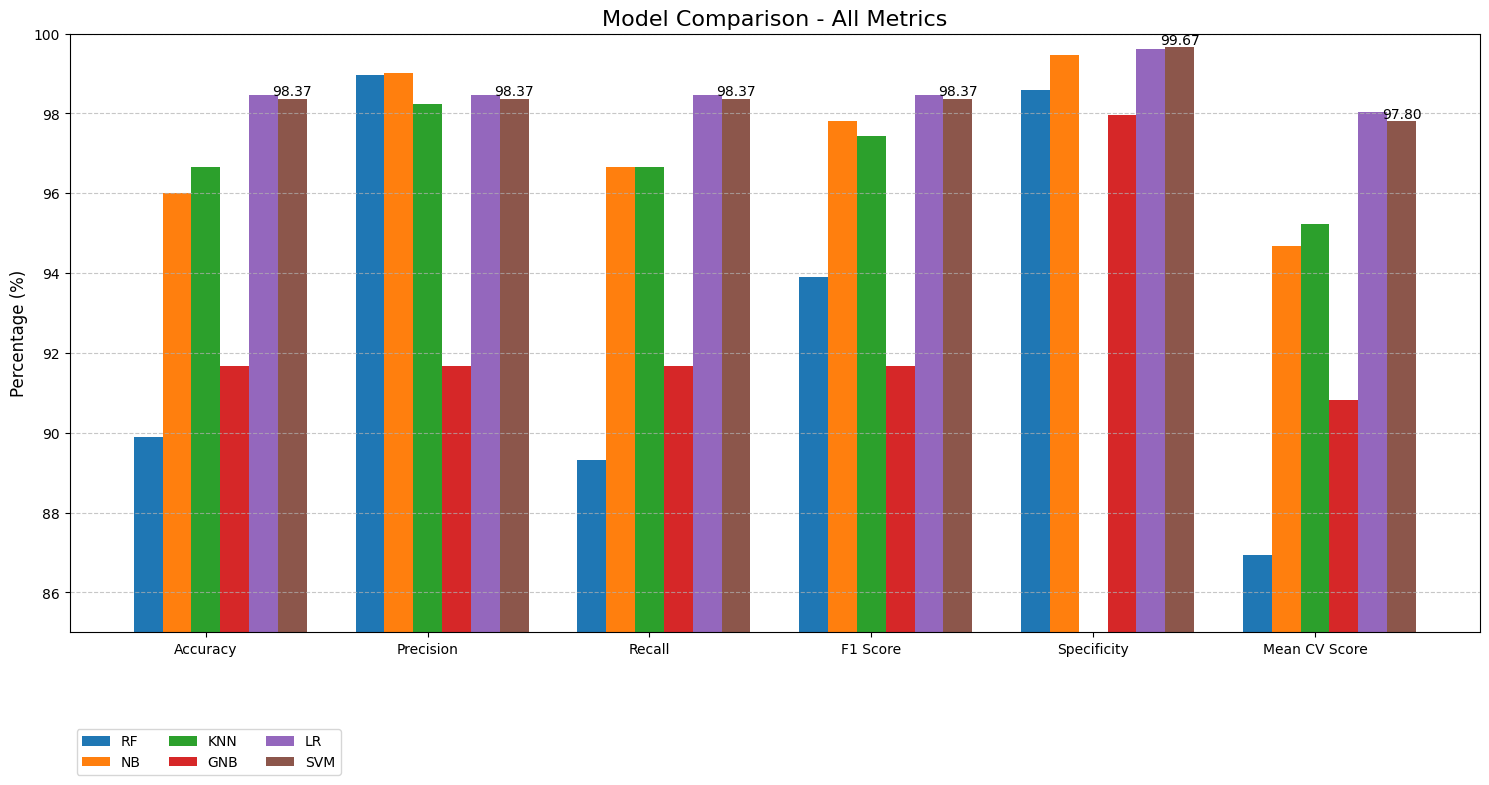

In [302]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['RF', 'NB', 'KNN', 'GNB', 'LR', 'SVM']
accuracy = [89.90, 96.01, 96.65, 91.68, 98.46, 98.37]
precision = [98.97, 99.01, 98.25, 91.68, 98.46, 98.37]
recall = [89.31, 96.65, 96.65, 91.68, 98.46, 98.37]
f1_score = [93.90, 97.81, 97.44, 91.68, 98.46, 98.37]
specificity = [98.60, 99.47, np.nan, 97.95, 99.61, 99.67]
log_loss = [np.nan, 0.104, 1.603, 3.036, np.nan, 0.054]     
mean_cv_score = [86.93, 94.68, 95.24, 90.83, 98.03, 97.80]  

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create a combined plot for all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'Mean CV Score']
data = [accuracy, precision, recall, f1_score, specificity, mean_cv_score]

plt.figure(figsize=(15, 8))
x = np.arange(len(metrics))
width = 0.13
multiplier = 0

for attribute, color in zip(models, colors):
    offset = width * multiplier
    rects = plt.bar(x + offset, [d[multiplier] for d in data], width, label=attribute, color=color)
    multiplier += 1

plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Model Comparison - All Metrics', fontsize=16)
plt.xticks(x + width * 2, metrics)  # Adjusting xticks position for better alignment
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.25), ncol=3)
plt.ylim(85, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, rect in enumerate(rects):
    height = rect.get_height()
    if not np.isnan(height):
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


*This script enables data scientists and stakeholders to visually compare and evaluate the performance of different machine learning models based on key metrics, aiding in model selection and optimization decisions.*

### Ranking Machine Learning Models by Mean Cross-Validation Score

#### Objective

The script ranks machine learning models based on their mean cross-validation scores using Python and numpy for data manipulation.

#### Steps

1. **Data Initialization**
   - Mean cross-validation scores are provided for models: Random Forest (RF), Naive Bayes (NB), K-Nearest Neighbors (KNN), Gaussian Naive Bayes (GNB), Logistic Regression (LR), and Support Vector Machine (SVM).

2. **Ranking Function**
   - A Python function `rank_models_by_cv` is defined to sort models based on their mean cross-validation scores in descending order.
   - Models are sorted using `sorted()` function with a lambda function as the key for sorting by score.

3. **Output**
   - The function prints a ranked list of models along with their respective mean cross-validation scores.
   - Each model is numbered sequentially, indicating its rank based on performance.


In [141]:
import numpy as np

# Mean cross-validation scores provided by the user
mean_cv_scores = {
    'RF': 86.93,
    'NB': 94.68,
    'KNN': 95.24,
    'GNB': 90.83,
    'LR': 98.03,
    'SVM': 97.80
}

# Function to rank models based on mean cross-validation score
def rank_models_by_cv(mean_cv_scores):
    # Sort models based on mean cross-validation scores
    sorted_models = sorted(mean_cv_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Print the ranking
    print('Ranking of models based on mean cross-validation score:')
    rank = 1
    for model, mean_score in sorted_models:
        print(f'{rank}. {model}: {mean_score:.4f}')
        rank += 1

# Example usage
rank_models_by_cv(mean_cv_scores)


Ranking of models based on mean cross-validation score:
1. LR: 98.0300
2. SVM: 97.8000
3. KNN: 95.2400
4. NB: 94.6800
5. GNB: 90.8300
6. RF: 86.9300


## Summary Insight from Model Ranking by Mean Cross-Validation Score

Based on the mean cross-validation scores, the models are ranked as follows:

1. **Logistic Regression (LR):** 98.03
2. **Support Vector Machine (SVM):** 97.80
3. **K-Nearest Neighbors (KNN):** 95.24
4. **Naive Bayes (NB):** 94.68
5. **Gaussian Naive Bayes (GNB):** 90.83
6. **Random Forest (RF):** 86.93

This ranking highlights the superior performance of Logistic Regression and SVM in terms of stability and accuracy across multiple folds of cross-validation. KNN and NB also demonstrate strong performance, while GNB and RF show comparatively lower mean scores, indicating potential areas for further optimization or evaluation.
